# Importing Libraries

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
% matplotlib inline
#import numpy as np
import matplotlib.pyplot as plt

# Importing datasets - wards, digital circulation, and branch locations
Plotting two geo dataframes (ward shape file and branch longs/lats)

In [2]:
#I imported the SHAPE FILE for the 44 wards of Toronto because the TPL's definitions for wards is slightly different
#B/c I need to bring in census data in phase two of the project, I need to tie back the branch locations to each ward
#Shape file sourced from - https://www1.toronto.ca/wps/portal/contentonly?vgnextoid=b1533f0aacaaa210VgnVCM1000006cd60f89RCRD
wards = gpd.read_file('wards_may2010/tcl3_icitw.shp')

In [3]:
#So, what are the wards of Toronto?
#I'm interested in the NAME and geometry
wards

CREATE_ID    GEO_ID LCODE_NAME                          NAME  OBJECTID  \
0       63519  14630026       EA41  Scarborough-Rouge River (41)         1   
1       63519  14630028       EA44         Scarborough East (44)         2   
2       63519  14630024       EA42  Scarborough-Rouge River (42)         3   
3       63519  14630027       EA39    Scarborough-Agincourt (39)         4   
4       63519  14630035       NO24               Willowdale (24)         5   
5       63519  14630029       EA40    Scarborough-Agincourt (40)         6   
6       63519  14630036       NO33          Don Valley East (33)         7   
7       63519  14630037       NO23               Willowdale (23)         8   
8       63519  14630039       NO08                 York West (8)         9   
9       63519  14630031       EA38       Scarborough Centre (38)        10   
10      63519  14630040       WE07                 York West (7)        11   
11      63519  14630041       NO34          Don Valley East (34)        12   
12      63519  14630010       NO25          Don Valley West (25)        13   
13      63519  14630030       EA43         Scarborough East (43)        14   
14      63519  14630038       NO10              York Centre (10)        15   
15      63519  14630043       NO09               York Centre (9)        16   
16      63519  14630033       EA36    Scarborough Southwest (36)        17   
17      63519  14630032       EA37       Scarborough Centre (37)        18   
18      63519  14630044       WE01           Etobicoke North (1)        19   
19      63519  14630019       NO15        Eglinton-Lawrence (15)        21   
20      63519  14630034       EA35    Scarborough Southwest (35)        22   
21      63519  14630012       NO26          Don Valley West (26)        23   
22      63519  14630017       WE11        York South-Weston (11)        24   
23      63519  14630045       WE02           Etobicoke North (2)        25   
24      63519  14630015       SO29         Toronto-Danforth (29)        26   
25      63519  14630021       WE12        York South-Weston (12)        28   
26      63519  14630016       SO32        Beaches-East York (32)        29   
27      63519  14630013       SO31        Beaches-East York (31)        30   
28      63519  14630050       SO22               St. Paul's (22)        31   
29      63519  14630020       SO21               St. Paul's (21)        32   
30      63519  14630052       SO30         Toronto-Danforth (30)        33   
31      63519  14630046       WE04          Etobicoke Centre (4)        34   
32      63519  14630051       SO27  Toronto Centre-Rosedale (27)        35   
33      63519  14630056       SO18                Davenport (18)        36   
34      63519  14630047       WE03          Etobicoke Centre (3)        38   
35      63519  14630054       SO28  Toronto Centre-Rosedale (28)        39   
36      63519  14630053       SO20          Trinity-Spadina (20)        40   
37      63519  14630048       WE05       Etobicoke-Lakeshore (5)        43   
38      63519  14630049       WE06       Etobicoke-Lakeshore (6)        44   
39      63519  14630042       NO16        Eglinton-Lawrence (16)        20   
40      66086  14652634       SO14       Parkdale-High Park (14)       329   
41      66052  14630023       WE13       Parkdale-High Park (13)       325   
42      66047  14630055       SO19          Trinity-Spadina (19)       321   
43      66055  14653066       WE17                Davenport (17)       326   

   SCODE_NAME  SHAPE_AREA  SHAPE_LEN TYPE_CODE TYPE_DESC  \
0          41         0.0        0.0      CITW      Ward   
1          44         0.0        0.0      CITW      Ward   
2          42         0.0        0.0      CITW      Ward   
3          39         0.0        0.0      CITW      Ward   
4          24         0.0        0.0      CITW      Ward   
5          40         0.0        0.0      CITW      Ward   
6          33         0.0        0.0      CITW      Ward   
7          23

In [4]:
#How many wards do we have? Confirmed that Toronto has 44 wards. 
wards.shape

(44, 11)

In [5]:
wards.dtypes

CREATE_ID       int64
GEO_ID          int64
LCODE_NAME     object
NAME           object
OBJECTID        int64
SCODE_NAME     object
SHAPE_AREA    float64
SHAPE_LEN     float64
TYPE_CODE      object
TYPE_DESC      object
geometry       object
dtype: object

In [7]:
#Next, I need to read in the digital checkouts from TPL
ecirculation = pd.read_excel('eProduct_Symphony_BranchDetails_201706/eProduct_CirculationActivityDetail-201706.xlsx')

In [10]:
#I'm interested in Title, Creator, Subject, Format, Branch
ecirculation.head(3)

Title Edition        Creator Language Audience/Rating  \
0        A   Rare Chance     NaN  Carla Neggers  English   Adult Fiction   
1        A   Rare Chance     NaN  Carla Neggers  English   Adult Fiction   
2  The  Balance of Guilt     NaN     Simon Hall  English   Adult Fiction   

            Subject Format               Publisher Date Added to site Own  \
0  Fiction, Romance  eBook  Simon & Schuster, Inc.         2014-11-20   2   
1  Fiction, Romance  eBook  Simon & Schuster, Inc.         2014-11-20   2   
2  Fiction, Mystery  eBook  Simon & Schuster, Inc.         2017-01-24   1   

   ...      Borrowed from Bought by Renewal  Content access levels  \
0  ...    Main collection     Cons.       No                 Adult   
1  ...    Main collection     Cons.       No                 Adult   
2  ...    Main collection     Cons.       No                 Adult   

          Barcode Extra1  Extra2 Extra3 Extra4 Extra5  
0  27131004049930    NaN     NaN    NaN    NaN    NaN  
1  27131022681904    NaN     NaN    NaN    NaN    NaN  
2  27131004087179    NaN     NaN    NaN    NaN    NaN  

[3 rows x 27 columns]

In [11]:
#For the month of JUNE, TPL had 371, 995 checkouts for ecirc
ecirculation.shape

(371995, 27)

In [12]:
ecirculation.dtypes

Title                            object
Edition                          object
Creator                          object
Language                         object
Audience/Rating                  object
Subject                          object
Format                           object
Publisher                        object
Date Added to site       datetime64[ns]
Own                              object
Lic. purchased                   object
Lic. left                        object
Lic. used                        object
Checkout ID                      object
Branch                           object
Checked out              datetime64[ns]
Lending period                    int64
Borrowed from                    object
Bought by                        object
Renewal                          object
Content access levels            object
Barcode                           int64
Extra1                          float64
Extra2                          float64
Extra3                          float64


In [13]:
#Cleaning up the file
#Drop unnecessary columns like the extra cols at the end and license cols
del ecirculation['Extra1'] 
del ecirculation['Extra2'] 
del ecirculation['Extra3'] 
del ecirculation['Extra4'] 
del ecirculation['Extra5'] 
del ecirculation['Lic. purchased'] 
del ecirculation['Lic. left']
del ecirculation['Lic. used']

In [14]:
pd.set_option("display.max_rows", 10000)
ecirculation.Branch.value_counts()

North York Central Library (Toronto Public Library)    15905
Toronto Public Library                                 15370
Toronto Reference Library (Toronto Public Library)     13512
City Hall (Toronto Public Library)                     13212
Northern District (Toronto Public Library)              9727
Eatonville (Toronto Public Library)                     8607
Lillian H. Smith (Toronto Public Library)               8419
Pape/Danforth (Toronto Public Library)                  8390
Deer Park (Toronto Public Library)                      7918
Richview (Toronto Public Library)                       7802
Fairview (Toronto Public Library)                       7558
Locke (Toronto Public Library)                          7322
Beaches (Toronto Public Library)                        7218
Runnymede (Toronto Public Library)                      7179
Don Mills (Toronto Public Library)                      7064
Bayview (Toronto Public Library)                        6694
Yorkville (Toronto Publi

In [15]:
#The library has long/lat data for each branch in their bridge table so I need to read that in
bridge = pd.read_excel('eProduct_Symphony_BranchDetails_201706/BranchBridgeTable.xls')
bridge

Branch No Branch Code   LATITUDE  LONGITUDE  Machines  \
0          110          LD        NaN        NaN       NaN   
1            1          AG  43.786081 -79.291331      47.0   
2            2         ACD  43.708592 -79.268811      36.0   
3            3          AB  43.739691 -79.580803      30.0   
4            4          AD  43.601535 -79.546548       7.0   
5            5          AP  43.706986 -79.484822       6.0   
6            6          AN  43.663523 -79.466283      11.0   
7          102          AL        NaN        NaN       NaN   
8            7          AH  43.738672 -79.421163       5.0   
9          113          PR        NaN        NaN       NaN   
10           8          BF  43.720534 -79.432206      32.0   
11           9          BY  43.769031 -79.388564       6.0   
12          10          BE  43.670206 -79.299225      12.0   
13          11          BD  43.749980 -79.244444       9.0   
14         105          BS        NaN        NaN       NaN   
15          12          BC  43.720155 -79.512617       6.0   
16          13          BL  43.660049 -79.434382      44.0   
17         200       BKONE        NaN        NaN       NaN   
18         201       BKTWO        NaN        NaN       NaN   
19          14          BR  43.647108 -79.513883      40.0   
20          15         BRW  43.796812 -79.315815       7.0   
21          16          BB  43.759397 -79.325638       9.0   
22          17         BUR  43.793628 -79.234547      10.0   
23          18         CED  43.756656 -79.224331      63.0   
24          19          CE  43.772579 -79.449595       9.0   
25          20          CH  43.651692 -79.382763       8.0   
26          21          CC  43.725851 -79.231485       9.0   
27          22          CS  43.655042 -79.419625       7.0   
28          23          DA  43.683821 -79.321411       9.0   
29          24          DT  43.673350 -79.427759       3.0   
30          25          DR  43.701686 -79.296963      18.0   
31          26          DP  43.688577 -79.391999      17.0   
32          27          DM  43.736073 -79.348674      25.0   
33          28          DO  43.728520 -79.482391      31.0   
34          29          DU  43.677282 -79.442812      19.0   
35          30          EA  43.646501 -79.558731      12.0   
36          31          ES  43.723583 -79.301661       8.0   
37         106          EL        NaN        NaN       NaN   
38          32          EB  43.658737 -79.585865       4.0   
39          33          EG  43.686245 -79.471381      11.0   
40          34          FV  43.779591 -79.346028      56.0   
41          35          FP  43.718329 -79.331446      15.0   
42          36          FH  43.702075 -79.420547       6.0   
43          37          FO  43.639045 -79.399722      15.0   
44          38          GE  43.672196 -79.322419       7.0   
45          39         GHP  43.824810 -79.277984      10.0   
46          40          GW  43.747291 -79.199787       6.0   
47          41          HP  43.645061 -79.448644       9.0   
48          42          HC  43.789633 -79.175557      10.0   
49          43         HIL  43.798117 -79.369900      12.0   
50         107         HLS        NaN        NaN       NaN   
51          44          HB  43.630080 -79.490817       3.0   
52          45          HS  43.757982 -79.570354       6.0   
53          46          HW  43.729284 -79.619859       7.0   
54         109          IT        NaN        NaN       NaN   
55         108          IL        NaN        NaN       NaN   
56         115        IBBY        NaN        NaN       NaN   
57          47          JD  43.665071 -79.490934      19.0   
58          48          JS  43.739743 -79.509475      11.0   
59          49          JO  43.665882 -79.334214       7.0   
60          50          KE  43.731900 -79.269436      15.0   
61          51          LE  43.706430 -79.367937      11.0   
62          52          LS  43.658153 -79.398792      38.0   
63          53          LO  43.724659

In [16]:
#Before merging the file, I need to inspect the NaN values
bridge[bridge['OverDrive Branch'].isnull()]

Branch No Branch Code   LATITUDE  LONGITUDE  Machines Area District  \
0          110          LD        NaN        NaN       NaN  CWS      CWS   
7          102          AL        NaN        NaN       NaN  NaN      NaN   
9          113          PR        NaN        NaN       NaN   RS       RS   
14         105          BS        NaN        NaN       NaN  NaN      NaN   
17         200       BKONE        NaN        NaN       NaN  CWS      CWS   
18         201       BKTWO        NaN        NaN       NaN  CWS      CWS   
37         106          EL        NaN        NaN       NaN  NaN      NaN   
50         107         HLS        NaN        NaN       NaN  CWS      CWS   
54         109          IT        NaN        NaN       NaN  NaN      NaN   
55         108          IL        NaN        NaN       NaN  NaN      NaN   
56         115        IBBY        NaN        NaN       NaN  NaN      NaN   
70         111          ME  43.658153 -79.398792       NaN  NaN      NaN   
80         112          OS  43.658153 -79.398792       NaN  NaN      NaN   
97         118         SAR  43.670986 -79.387080       NaN  NaN      NaN   
98         119        SARS        NaN        NaN       NaN  NaN      NaN   
99         116        SACD  43.692336 -79.368193       NaN  NaN      NaN   
100        117       SACDS  43.690955 -79.368686       NaN  NaN      NaN   
101        120         SBR        NaN        NaN       NaN  NaN      NaN   
102        121        SBRS  43.670250 -79.387137       NaN  NaN      NaN   
107        114          SB  43.721108 -79.378837       NaN  CWS      CWS   
114        122        TRLS  43.671712 -79.387384       NaN  NaN      NaN   
115        123         URB        NaN        NaN       NaN  NaN      NaN   
117        124         VIR        NaN        NaN       NaN  NaN      NaN   
118        153         WEB        NaN        NaN       NaN  NaN      NaN   

                                       Branch Name  \
0                        Adult Literacy Department   
7                                       Answerline   
9                           Automated Phone System   
14                          Bibliographic Services   
17                                  Bookmobile One   
18                                  Bookmobile Two   
37                              Ellesmere Facility   
50                            Home Library Service   
54                          Information Technology   
55                                       Interloan   
56   International Board on Books for Young People   
70                               Merril Collection   
80                              Osborne Collection   
97                    Special Collections Art Room   
98             Special Collections Art Room Stacks   
99          Special Collections Arthur Conan Doyle   
100  Special Collections Arthur Conan Doyle Stacks   
101               Special Collections Baldwin Room   
102        Special Collections Baldwin Room Stacks   
107                            Sunnybrook Hospital   
114               Toronto Reference Library Stacks   
115                                  Urban Affairs   
117                                Virtual Library   
118                                    Web Renewal   

                                     Branch Name 2 Nbhd Tier  \
0                        Adult Literacy Department       NaN   
7                                       Answerline       NaN   
9                           Automated Phone System       NaN   
14                          Bibliographic Services       NaN   
17                                  Bookmobile One       NaN   
18                                  Bookmobile Two       NaN   
37                              Ellesmere Facility       NaN   
50                            Home Library Service       NaN   
54                          Information Technology       NaN   
55                                       Interloan       NaN   
56   International Board on Books for Young Peopl

In [17]:
#It's ok to drop these NaN values, none of them have any e-circ data when I cross reference against ecirculation
ecirculation[ecirculation['Branch'] == 'Rosedale-Moore Park']

Empty DataFrame
Columns: [Title, Edition, Creator, Language, Audience/Rating, Subject, Format, Publisher, Date Added to site, Own, Checkout ID, Branch, Checked out, Lending period, Borrowed from, Bought by, Renewal , Content access levels, Barcode]
Index: []

In [18]:
#Drop NaN values in bridge file permanently
bridge.dropna(subset=['facility_master_id'], inplace=True)

In [19]:
bridge.head(3)

Branch No Branch Code   LATITUDE  LONGITUDE  Machines  \
1          1          AG  43.786081 -79.291331      47.0   
2          2         ACD  43.708592 -79.268811      36.0   
3          3          AB  43.739691 -79.580803      30.0   

                                Area         District      Branch Name  \
1    Agincourt-Barbara Frum-Fairview        Agincourt        Agincourt   
2  Albert Campbell-Cedarbrae-Malvern  Albert Campbell  Albert Campbell   
3      Albion-M.A.Shchuka-York Woods           Albion           Albion   

     Branch Name 2 Nbhd Tier          ...                   City NIA2014  \
1        Agincourt  District          ...            Scarborough     0.0   
2  Albert Campbell  District          ...            Scarborough     1.0   
3           Albion  District          ...              Etobicoke     1.0   

      Branch Address  Branch Telephone City Councillor 2014-2018  FSA Prov  \
1      155 Bonis Ave    (416) 396-8943                Norm Kelly  M1T   ON   
2  496 Birchmount Rd    (416) 396-8890     Michelle Berardinetti  M1K   ON   
3     1515 Albion Rd    (416) 394-5170          Vincent Crisanti  M9V   ON   

  RealBranch  Ward No            Ward Region  
1          1     40.0  Scarborough Agincourt  
2          1     35.0  Scarborough Southwest  
3          1      1.0        Etobicoke North  

[3 rows x 29 columns]

In [20]:
ecirculation.head(3)

Title Edition        Creator Language Audience/Rating  \
0        A   Rare Chance     NaN  Carla Neggers  English   Adult Fiction   
1        A   Rare Chance     NaN  Carla Neggers  English   Adult Fiction   
2  The  Balance of Guilt     NaN     Simon Hall  English   Adult Fiction   

            Subject Format               Publisher Date Added to site Own  \
0  Fiction, Romance  eBook  Simon & Schuster, Inc.         2014-11-20   2   
1  Fiction, Romance  eBook  Simon & Schuster, Inc.         2014-11-20   2   
2  Fiction, Mystery  eBook  Simon & Schuster, Inc.         2017-01-24   1   

        Checkout ID                                     Branch Checked out  \
0  243-893802-00090          Richview (Toronto Public Library)  2017-06-22   
1  243-928875-00048       Thorncliffe (Toronto Public Library)  2017-06-04   
2  243-854927-00653  Swansea Memorial (Toronto Public Library)  2017-06-04   

   Lending period    Borrowed from Bought by Renewal  Content access levels  \
0              21  Main collection     Cons.       No                 Adult   
1              21  Main collection     Cons.       No                 Adult   
2              21  Main collection     Cons.       No                 Adult   

          Barcode  
0  27131004049930  
1  27131022681904  
2  27131004087179

In [21]:
ecirculation.Format.value_counts()

eBook        297844
Audiobook     72783
Video          1368
Name: Format, dtype: int64

In [22]:
#The code for merging creating geometric points for ecirculation keeps stalling so I am going to filter just for ebooks
ecirculation[ecirculation['Format'] == 'eBook']

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [23]:
#Confirmed that in June, TPL had 297, 844 ebook check outs
ebook_circulation = ecirculation[ecirculation['Format'] == 'eBook']
ebook_circulation.shape

(297844, 19)

In [24]:
#Need to get the longitudes and latitdues from the bridge df to the ebook df
#Merge on cols "OverDrive Branch"(bridge) and "Branch"(ebook_circulation)
ebook_with_locations = ebook_circulation.merge(bridge, left_on="Branch", right_on="OverDrive Branch")

In [25]:
pd.set_option("display.max_columns", 10000)
ebook_with_locations.head(100)

Title  Edition  \
0                                     A   Rare Chance      NaN   
1                                《黄帝内经》养生全书：先天之本-肾的保健      NaN   
2                                   3, 2, 1, Liftoff!      NaN   
3   The 5: 2 Diet: Feast for 5 Days, Fast for 2 Da...      NaN   
4                        5 Love Languages of Children      NaN   
5   The 5 Second Rule: Transform Your Life, Work, ...      NaN   
6   8 Habits of Love: Open Your Heart, Open Your Mind      NaN   
7   The 10 Habits of Happy Mothers: Reclaiming Our...      NaN   
8                                10 Valentine Friends      NaN   
9   10% Happier: How I Tamed the Voice in My Head,...      NaN   
10                                100 Cakes and Bakes      NaN   
11                             100 Games for Children        1   
12                                 100 Pablo Picassos      NaN   
13  100 Perfect Hair Days: Step-by-Steps for Prett...      NaN   
14  The 100 Simple Secrets of Successful People: W...      NaN   
15          The 100-Mile Diet: A Year of Local Eating      NaN   
16  The 100-Year-Old Man Who Climbed Out the Windo...      NaN   
17  The 100-Year-Old Man Who Climbed Out the Windo...      NaN   
18  101 Games and Activities for Children With Aut...        1   
19  101 Places in Italy: A Private Grand Tour: 100...      NaN   
20  101 Things To Do Before You Diet: Because Look...      NaN   
21  101 Top Tips for Digital Landscape Photography...      NaN   
22                  101 Ways to Clean Out the Clutter      NaN   
23  10-Minute Brain Teasers: Brain-Training Tips, ...      NaN   
24  10-Minute Brain Teasers: Brain-Training Tips, ...      NaN   
25                                   10-Minute Makeup      NaN   
26  10th Anniversary: Women's Murder Club Series, ...      NaN   
27                                  11/22/63: A Novel      NaN   
28                                  11/22/63: A Novel      NaN   
29     11th Hour: Women's Murder Club Series, Book 11      NaN   
30     11th Hour: Women's Murder Club Series, Book 11      NaN   
31  12th of Never: Women's Murder Club Series, Boo...      NaN   
32                   13 Ways of Looking at a Fat Girl      NaN   
33                   13 Ways of Looking at a Fat Girl      NaN   
34     The 14th Colony: Cotton Malone Series, Book 11      NaN   
35  14th Deadly Sin: Women's Murder Club Series, B...      NaN   
36  14th Deadly Sin: Women's Murder Club Series, B...      NaN   
37   15th Affair: Women's Murder Club Series, Book 15      NaN   
38   15th Affair: Women's Murder Club Series, Book 15      NaN   
39   15th Affair: Women's Murder Club Series, Book 15      NaN   
40       168 Hours: You Have More Time Than You Think      NaN   
41  16th Seduction: Women's Murder Club Series, Bo...      NaN   
42  16th Seduction: Women's Murder Club Series, Bo...      NaN   
43  16th Seduction: Women's Murder Club Series, Bo...      NaN   
44  16th Seduction: Women's Murder Club Series, Bo...      NaN   
45  16th Seduction: Women's Murder Club Series, Bo...      NaN   
46                            18 and Life on Skid Row      NaN   
47  18 Minutes: Find Your Focus, Master Distractio...      NaN   
48                                               1984      NaN   
49                                               1984      NaN   
50                                               1984      NaN   
51                                               1984      NaN   
52                             The 19th Wife: A Novel      NaN   
53     1st to Die: Women's Murder Club Series, Book 1      NaN   
54                      200 Low-Carb High-Fat Recipes      NaN   
55                            200 Ramen Noodle Dishes      NaN   
56                                         200 Salads      NaN   
57  The 200 SuperFoods That Will Save Your Life: A...        1   
58  21 Greatest Spy Thrillers in One Premium Editi...      NaN   
59                         22 Britannia Road: A Novel      NaN   
60                    

In [26]:
#So we're not confusing the Wards as defined by the TPL with the wards as defined by the city, let's rename these cols
ebook_with_locations.rename(columns={'Ward No': 'TPL_Ward No', 'Ward Region': 'TPL_Ward Region'}, inplace=True)

In [27]:
ebook_with_locations.head(3)

Title Edition        Creator Language   Audience/Rating  \
0       A   Rare Chance     NaN  Carla Neggers  English     Adult Fiction   
1  《黄帝内经》养生全书：先天之本-肾的保健     NaN            张湖德  Chinese  Adult Nonfiction   
2     3, 2, 1, Liftoff!     NaN   Sonia Sander  English  Juvenile Fiction   

                             Subject Format                Publisher  \
0                   Fiction, Romance  eBook   Simon & Schuster, Inc.   
1                Medical, Nonfiction  eBook  Green Apple Data Center   
2  Humor (Fiction), Juvenile Fiction  eBook    Scholastic, Inc. (US)   

  Date Added to site Own        Checkout ID  \
0         2014-11-20   2   243-893802-00090   
1         2014-09-18   2  243-1451063-00003   
2         2016-12-02   2  243-1311288-00004   

                              Branch Checked out  Lending period  \
0  Richview (Toronto Public Library)  2017-06-22              21   
1  Richview (Toronto Public Library)  2017-06-12              21   
2  Richview (Toronto Public Library)  2017-06-05              21   

     Borrowed from Bought by Renewal  Content access levels         Barcode  \
0  Main collection     Cons.       No                 Adult  27131004049930   
1  Main collection     Cons.       No                 Adult  27131039560901   
2  Main collection     Cons.       No                 Adult  27131019942376   

   Branch No Branch Code   LATITUDE  LONGITUDE  Machines  \
0         78          RI  43.683749 -79.540773      42.0   
1         78          RI  43.683749 -79.540773      42.0   
2         78          RI  43.683749 -79.540773      42.0   

                                 Area  District Branch Name Branch Name 2  \
0  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   
1  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   
2  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   

  Nbhd Tier Tier Youth Hub  Square Footage  facility_master_id  \
0  District   DL        No         47252.0                37.0   
1  District   DL        No         47252.0                37.0   
2  District   DL        No         47252.0                37.0   

  Branch Postal Code  FacilityID                   OverDrive Branch  \
0             M9P3N3      1098.0  Richview (Toronto Public Library)   
1             M9P3N3      1098.0  Richview (Toronto Public Library)   
2             M9P3N3      1098.0  Richview (Toronto Public Library)   

                          NBHD Name  NBHD No       City  NIA2014  \
0  Willowridge-Martingrove-Richview      7.0  Etobicoke      1.0   
1  Willowridge-Martingrove-Richview      7.0  Etobicoke      1.0   
2  Willowridge-Martingrove-Richview      7.0  Etobicoke      1.0   

       Branch Address Branch Telephone City Councillor 2014-2018  FSA Prov  \
0  1806 Islington Ave   (416) 394-5120             John Campbell  M9P   ON   
1  1806 Islington Ave   (416) 394-5120             John Campbell  M9P   ON   
2  1806 Islington Ave   (416) 394-5120             John Campbell  M9P   ON   

   RealBranch  TPL_Ward No   TPL_Ward Region  
0           1          4.0  Etobicoke Centre  
1           1          4.0  Etobicoke Centre  
2           1          4.0  Etobicoke Centre

In [28]:
#Creating geometric points for each lat/longitude pair
points = ebook_with_locations.apply (lambda row: Point(row.LONGITUDE, row.LATITUDE), axis = 1)

In [32]:
#Creating a geo data frame with geometric points
branches = gpd.GeoDataFrame(ebook_with_locations, geometry = points)

In [33]:
#Setting crs for branches
branches.crs = {'init': 'epsg:4267'}

In [34]:
branches.head(500)

Title  \
0                                      A   Rare Chance   
1                                 《黄帝内经》养生全书：先天之本-肾的保健   
2                                    3, 2, 1, Liftoff!   
3    The 5: 2 Diet: Feast for 5 Days, Fast for 2 Da...   
4                         5 Love Languages of Children   
5    The 5 Second Rule: Transform Your Life, Work, ...   
6    8 Habits of Love: Open Your Heart, Open Your Mind   
7    The 10 Habits of Happy Mothers: Reclaiming Our...   
8                                 10 Valentine Friends   
9    10% Happier: How I Tamed the Voice in My Head,...   
10                                 100 Cakes and Bakes   
11                              100 Games for Children   
12                                  100 Pablo Picassos   
13   100 Perfect Hair Days: Step-by-Steps for Prett...   
14   The 100 Simple Secrets of Successful People: W...   
15           The 100-Mile Diet: A Year of Local Eating   
16   The 100-Year-Old Man Who Climbed Out the Windo...   
17   The 100-Year-Old Man Who Climbed Out the Windo...   
18   101 Games and Activities for Children With Aut...   
19   101 Places in Italy: A Private Grand Tour: 100...   
20   101 Things To Do Before You Diet: Because Look...   
21   101 Top Tips for Digital Landscape Photography...   
22                   101 Ways to Clean Out the Clutter   
23   10-Minute Brain Teasers: Brain-Training Tips, ...   
24   10-Minute Brain Teasers: Brain-Training Tips, ...   
25                                    10-Minute Makeup   
26   10th Anniversary: Women's Murder Club Series, ...   
27                                   11/22/63: A Novel   
28                                   11/22/63: A Novel   
29      11th Hour: Women's Murder Club Series, Book 11   
30      11th Hour: Women's Murder Club Series, Book 11   
31   12th of Never: Women's Murder Club Series, Boo...   
32                    13 Ways of Looking at a Fat Girl   
33                    13 Ways of Looking at a Fat Girl   
34      The 14th Colony: Cotton Malone Series, Book 11   
35   14th Deadly Sin: Women's Murder Club Series, B...   
36   14th Deadly Sin: Women's Murder Club Series, B...   
37    15th Affair: Women's Murder Club Series, Book 15   
38    15th Affair: Women's Murder Club Series, Book 15   
39    15th Affair: Women's Murder Club Series, Book 15   
40        168 Hours: You Have More Time Than You Think   
41   16th Seduction: Women's Murder Club Series, Bo...   
42   16th Seduction: Women's Murder Club Series, Bo...   
43   16th Seduction: Women's Murder Club Series, Bo...   
44   16th Seduction: Women's Murder Club Series, Bo...   
45   16th Seduction: Women's Murder Club Series, Bo...   
46                             18 and Life on Skid Row   
47   18 Minutes: Find Your Focus, Master Distractio...   
48                                                1984   
49                                                1984   
50                                                1984   
51                                                1984   
52                              The 19th Wife: A Novel   
53      1st to Die: Women's Murder Club Series, Book 1   
54                       200 Low-Carb High-Fat Recipes   
55                             200 Ramen Noodle Dishes   
56                                          200 Salads   
57   The 200 SuperFoods That Will Save Your Life: A...   
58   21 Greatest Spy Thrillers in One Premium Editi...   
59                          22 Britannia Road: A Novel   
60                                                2312   
61      2nd Chance: Women's Murder Club Series, Book 2   
62   30-Minute Yoga: For Better Balance and Strengt...   
63   The 30-Second Body: Eat Clean, Train Dirty, Li...   
64         365 Games & Puzzles to Keep Your Mind Sharp   
65   365 Ways to Boost Your Metabolism: Everyday Ti...   
66   365 Ways to Live Cheap: Your Everyday Guide to...   
67      3rd Degree: Women's Murder Club Series, Book 3   
68    4.50 From Paddington: Miss Marple Series,

In [35]:
branches.shape

(229505, 49)

# Mapping the library branches over the wards to see if any wards are 'library dead zones'

In [36]:
#The city of Toronto used NAD27 as their datum, we should likely use the same for the branches (epsg = 4267)
wards.crs

{'datum': 'NAD27',
 'k': 0.9999,
 'lat_0': 0,
 'lon_0': -79.5,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 304800,
 'y_0': 0}

(291459.75695000001, 337856.13005000004, 4825036.63105, 4858633.8199499995)

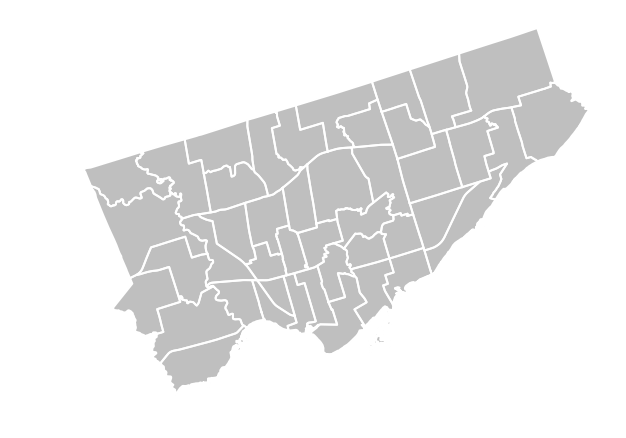

In [37]:
ax = wards.plot(figsize=(10,10),color = 'grey', edgecolor = 'white', linewidth = 2)
ax.axis('off')

KeyboardInterrupt: 

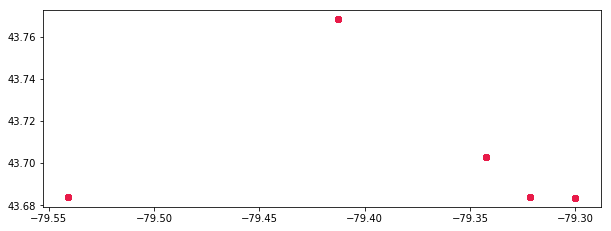

In [38]:
# Nice to have and not need to have so I just interrupted the process, it was taking too long to run
# ax = branches.plot(figsize=(10,10), color='#E81B49', markersize = 5, alpha= 0.5)
# ax.axis('off')

In [39]:
branches.crs

{'init': 'epsg:4267'}

In [40]:
wards.crs

{'datum': 'NAD27',
 'k': 0.9999,
 'lat_0': 0,
 'lon_0': -79.5,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 304800,
 'y_0': 0}

In [41]:
#Matching CRS for both data frames
branches.to_crs(wards.crs, inplace=True)

In [ ]:
#2 of the 44 wards in Toronto don't have any branches inside their boundaries
#ax = wards.plot(figsize=(10,10),color = 'grey', edgecolor = 'white', linewidth = 2)
#ax = branches.plot(figsize=(10,10), color='#E81B49', markersize = 6, alpha= 0.5, ax=ax)
#ax.axis('off')

# Spatially joining wards with branches

In [42]:
branches.head()

Title Edition          Creator  \
0                                    A   Rare Chance     NaN    Carla Neggers   
1                               《黄帝内经》养生全书：先天之本-肾的保健     NaN              张湖德   
2                                  3, 2, 1, Liftoff!     NaN     Sonia Sander   
3  The 5: 2 Diet: Feast for 5 Days, Fast for 2 Da...     NaN    Kate Harrison   
4                       5 Love Languages of Children     NaN  Gary D. Chapman   

  Language   Audience/Rating                             Subject Format  \
0  English     Adult Fiction                    Fiction, Romance  eBook   
1  Chinese  Adult Nonfiction                 Medical, Nonfiction  eBook   
2  English  Juvenile Fiction   Humor (Fiction), Juvenile Fiction  eBook   
3  English  Adult Nonfiction        Health & Fitness, Nonfiction  eBook   
4  English  Adult Nonfiction  Family & Relationships, Nonfiction  eBook   

                 Publisher Date Added to site Own        Checkout ID  \
0   Simon & Schuster, Inc.         2014-11-20   2   243-893802-00090   
1  Green Apple Data Center         2014-09-18   2  243-1451063-00003   
2    Scholastic, Inc. (US)         2016-12-02   2  243-1311288-00004   
3     Lightning Source Inc         2015-03-19   2  243-1445315-00001   
4         Moody Publishers         2015-09-05  10  243-1196123-00438   

                              Branch Checked out  Lending period  \
0  Richview (Toronto Public Library)  2017-06-22              21   
1  Richview (Toronto Public Library)  2017-06-12              21   
2  Richview (Toronto Public Library)  2017-06-05              21   
3  Richview (Toronto Public Library)  2017-06-01              21   
4  Richview (Toronto Public Library)  2017-06-09              21   

     Borrowed from Bought by Renewal  Content access levels         Barcode  \
0  Main collection     Cons.       No                 Adult  27131004049930   
1  Main collection     Cons.       No                 Adult  27131039560901   
2  Main collection     Cons.       No                 Adult  27131019942376   
3  Main collection     Cons.       No                 Adult  27131030940979   
4  Main collection     Cons.       No                 Adult  27131026799827   

   Branch No Branch Code   LATITUDE  LONGITUDE  Machines  \
0         78          RI  43.683749 -79.540773      42.0   
1         78          RI  43.683749 -79.540773      42.0   
2         78          RI  43.683749 -79.540773      42.0   
3         78          RI  43.683749 -79.540773      42.0   
4         78          RI  43.683749 -79.540773      42.0   

                                 Area  District Branch Name Branch Name 2  \
0  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   
1  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   
2  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   
3  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   
4  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   

  Nbhd Tier Tier Youth Hub  Square Footage  facility_master_id  \
0  District   DL        No         47252.0                37.0   
1  District   DL        No         47252.0                37.0   
2  District   DL        No         47252.0                37.0   
3  District   DL        No         47252.0                37.0   
4  District   DL        No         47252.0                37.0   

  Branch Postal Code  FacilityID                   OverDrive Branch  \
0             M9P3N3      1098.0  Richview (Toronto Public Library)   
1             M9P3N3      1098.0  Richview (Toronto Public Library)   
2             M9P3N3      1098.0  Richview (Toronto Public Library)   
3             M9P3N3      1098.0  Richview (Toronto Public Library)   
4             M9P3N3      1098.0  Richview (Toronto Public Library)   

                          NBHD Name  NBHD No       City  NIA2014  \
0  Willowridge-Martingrove-Richview      7.0  Etobicoke      1.0   
1  Willo

In [43]:
wards.head()

CREATE_ID    GEO_ID LCODE_NAME                          NAME  OBJECTID  \
0      63519  14630026       EA41  Scarborough-Rouge River (41)         1   
1      63519  14630028       EA44         Scarborough East (44)         2   
2      63519  14630024       EA42  Scarborough-Rouge River (42)         3   
3      63519  14630027       EA39    Scarborough-Agincourt (39)         4   
4      63519  14630035       NO24               Willowdale (24)         5   

  SCODE_NAME  SHAPE_AREA  SHAPE_LEN TYPE_CODE TYPE_DESC  \
0         41         0.0        0.0      CITW      Ward   
1         44         0.0        0.0      CITW      Ward   
2         42         0.0        0.0      CITW      Ward   
3         39         0.0        0.0      CITW      Ward   
4         24         0.0        0.0      CITW      Ward   

                                            geometry  
0  POLYGON ((323712.401 4848647.35, 323704.584 48...  
1  POLYGON ((331296.368 4846015.756, 331293.471 4...  
2  POLYGON ((326861.823 4849750.979, 326853.721 4...  
3  POLYGON ((318351.687 4850141, 318318 4850242, ...  
4  POLYGON ((313867.121 4846840.841, 313861.781 4...

In [44]:
branches.crs

{'datum': 'NAD27',
 'k': 0.9999,
 'lat_0': 0,
 'lon_0': -79.5,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 304800,
 'y_0': 0}

In [45]:
wards.crs

{'datum': 'NAD27',
 'k': 0.9999,
 'lat_0': 0,
 'lon_0': -79.5,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 304800,
 'y_0': 0}

In [63]:
branches_within_wards = gpd.sjoin(branches.reset_index(), wards, how='left', op='within')

In [64]:
branches_within_wards.shape

(229505, 61)

In [65]:
branches_within_wards.head()

index                                              Title Edition  \
0      0                                    A   Rare Chance     NaN   
1      1                               《黄帝内经》养生全书：先天之本-肾的保健     NaN   
2      2                                  3, 2, 1, Liftoff!     NaN   
3      3  The 5: 2 Diet: Feast for 5 Days, Fast for 2 Da...     NaN   
4      4                       5 Love Languages of Children     NaN   

           Creator Language   Audience/Rating  \
0    Carla Neggers  English     Adult Fiction   
1              张湖德  Chinese  Adult Nonfiction   
2     Sonia Sander  English  Juvenile Fiction   
3    Kate Harrison  English  Adult Nonfiction   
4  Gary D. Chapman  English  Adult Nonfiction   

                              Subject Format                Publisher  \
0                    Fiction, Romance  eBook   Simon & Schuster, Inc.   
1                 Medical, Nonfiction  eBook  Green Apple Data Center   
2   Humor (Fiction), Juvenile Fiction  eBook    Scholastic, Inc. (US)   
3        Health & Fitness, Nonfiction  eBook     Lightning Source Inc   
4  Family & Relationships, Nonfiction  eBook         Moody Publishers   

  Date Added to site Own        Checkout ID  \
0         2014-11-20   2   243-893802-00090   
1         2014-09-18   2  243-1451063-00003   
2         2016-12-02   2  243-1311288-00004   
3         2015-03-19   2  243-1445315-00001   
4         2015-09-05  10  243-1196123-00438   

                              Branch Checked out  Lending period  \
0  Richview (Toronto Public Library)  2017-06-22              21   
1  Richview (Toronto Public Library)  2017-06-12              21   
2  Richview (Toronto Public Library)  2017-06-05              21   
3  Richview (Toronto Public Library)  2017-06-01              21   
4  Richview (Toronto Public Library)  2017-06-09              21   

     Borrowed from Bought by Renewal  Content access levels         Barcode  \
0  Main collection     Cons.       No                 Adult  27131004049930   
1  Main collection     Cons.       No                 Adult  27131039560901   
2  Main collection     Cons.       No                 Adult  27131019942376   
3  Main collection     Cons.       No                 Adult  27131030940979   
4  Main collection     Cons.       No                 Adult  27131026799827   

   Branch No Branch Code   LATITUDE  LONGITUDE  Machines  \
0         78          RI  43.683749 -79.540773      42.0   
1         78          RI  43.683749 -79.540773      42.0   
2         78          RI  43.683749 -79.540773      42.0   
3         78          RI  43.683749 -79.540773      42.0   
4         78          RI  43.683749 -79.540773      42.0   

                                 Area  District Branch Name Branch Name 2  \
0  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   
1  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   
2  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   
3  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   
4  Bloor/Gladstone-Brentwood-Richview  Richview    Richview      Richview   

  Nbhd Tier Tier Youth Hub  Square Footage  facility_master_id  \
0  District   DL        No         47252.0                37.0   
1  District   DL        No         47252.0                37.0   
2  District   DL        No         47252.0                37.0   
3  District   DL        No         47252.0                37.0   
4  District   DL        No         47252.0                37.0   

  Branch Postal Code  FacilityID                   OverDrive Branch  \
0             M9P3N3      1098.0  Richview (Toronto Public Library)   
1             M9P3N3      1098.0  Richview (Toronto Public Library)   
2             M9P3N3      1098.0  Richview (Toronto Public Library)   
3             M9P3N3      1098.0  Richview (Toronto Public Library)   
4             M9P3N3      1098.0  Richview (Toronto Public Library)   

                          N

In [56]:
#Here we're spatially joining the two data frames
#We want to keep every single row in the branches data set even if it isn't in a ward
wards_with_branches = gpd.sjoin(wards.reset_index(), branches, how='inner', op='intersects')

In [60]:
wards_with_branches.shape

(229505, 61)

In [62]:
wards_with_branches.head()

index  CREATE_ID    GEO_ID LCODE_NAME                          NAME  \
0      0      63519  14630026       EA41  Scarborough-Rouge River (41)   
0      0      63519  14630026       EA41  Scarborough-Rouge River (41)   
0      0      63519  14630026       EA41  Scarborough-Rouge River (41)   
0      0      63519  14630026       EA41  Scarborough-Rouge River (41)   
0      0      63519  14630026       EA41  Scarborough-Rouge River (41)   

   OBJECTID SCODE_NAME  SHAPE_AREA  SHAPE_LEN TYPE_CODE TYPE_DESC  \
0         1         41         0.0        0.0      CITW      Ward   
0         1         41         0.0        0.0      CITW      Ward   
0         1         41         0.0        0.0      CITW      Ward   
0         1         41         0.0        0.0      CITW      Ward   
0         1         41         0.0        0.0      CITW      Ward   

                                            geometry  index_right  \
0  POLYGON ((323712.401 4848647.35, 323704.584 48...       202220   
0  POLYGON ((323712.401 4848647.35, 323704.584 48...       202221   
0  POLYGON ((323712.401 4848647.35, 323704.584 48...       202222   
0  POLYGON ((323712.401 4848647.35, 323704.584 48...       202223   
0  POLYGON ((323712.401 4848647.35, 323704.584 48...       202224   

                                               Title Edition  \
0                                 Truly Madly Guilty     NaN   
0                                      Turn Me Loose     NaN   
0               Twelve Kisses to Midnight: A Novella     NaN   
0                      Undone: An Unraveling Novella     NaN   
0  An Unexpected Attraction: Love Unexpected Seri...     NaN   

            Creator Language      Audience/Rating  \
0    Liane Moriarty  English        Adult Fiction   
0      Anne Calhoun  English        Adult Fiction   
0     Karen Hawkins  English        Adult Fiction   
0  Elizabeth Norris  English  Young Adult Fiction   
0   Delaney Diamond  English        Adult Fiction   

                                             Subject Format  \
0                                Fiction, Literature  eBook   
0                         Fiction, Romance, Suspense  eBook   
0               Fiction, Historical Fiction, Romance  eBook   
0  Science Fiction, Short Stories, Young Adult Fi...  eBook   
0                                   Fiction, Romance  eBook   

                       Publisher Date Added to site Own        Checkout ID  \
0           Macmillan Publishers         2016-07-11   0   243-907686-00557   
0           Macmillan Publishers         2017-06-05   0   243-935599-00808   
0         Simon & Schuster, Inc.         2017-03-21   2  243-1100546-01718   
0  HarperCollins Publishers Inc.         2013-03-04   0  243-1184757-00110   
0            Garden Avenue Press         2017-03-29   2  243-1103786-01601   

                                     Branch Checked out  Lending period  \
0  Woodside Square (Toronto Public Library)  2017-06-26              21   
0  Woodside Square (Toronto Public Library)  2017-06-07              21   
0  Woodside Square (Toronto Public Library)  2017-06-14              21   
0  Woodside Square (Toronto Public Library)  2017-06-03              21   
0  Woodside Square (Toronto Public Library)  2017-06-01              21   

     Borrowed from Bought by Renewal  Content access levels         Barcode  \
0  Main collection     Cons.       No                 Adult  27131028919795   
0  Main collection     Cons.       No                 Adult  27131009357312   
0  Main collection     Cons.       No                 Adult  27131030079786   
0  Main collection     Cons.       No                 Adult  27131037180330   
0  Main collection     Cons.       No                 Adult  27131016911622   

   Branch No Branch Code   LATITUDE  LONGITUDE  Machines  \
0         96          WS  43.810949 -79.270957      24.0   
0         96          WS  43.810949 -79.270957      24.0   
0         96          WS  43.810949 -79.270957      24.0   
0         

In [71]:
wards_with_branches.dtypes

index                                 int64
CREATE_ID                             int64
GEO_ID                                int64
LCODE_NAME                           object
NAME                                 object
OBJECTID                              int64
SCODE_NAME                           object
SHAPE_AREA                          float64
SHAPE_LEN                           float64
TYPE_CODE                            object
TYPE_DESC                            object
geometry                             object
index_right                           int64
Title                                object
Edition                              object
Creator                              object
Language                             object
Audience/Rating                      object
Subject                              object
Format                               object
Publisher                            object
Date Added to site           datetime64[ns]
Own                             

In [75]:
wards_with_branches_csv = wards_with_branches[['Title','Creator','Subject','Format','Branch','Branch No','Branch Code','LATITUDE','LONGITUDE','OverDrive Branch','Branch Address','Branch Telephone', 'TPL_Ward Region','NAME','geometry' ]]

In [78]:
wards_with_branches_csv.head(100)

Title                Creator  \
0                                 Truly Madly Guilty         Liane Moriarty   
0                                      Turn Me Loose           Anne Calhoun   
0               Twelve Kisses to Midnight: A Novella          Karen Hawkins   
0                      Undone: An Unraveling Novella       Elizabeth Norris   
0  An Unexpected Attraction: Love Unexpected Seri...        Delaney Diamond   
0      Unholy Ghosts: Downside Ghosts Series, Book 1            Stacia Kane   
0                                An Unlikely Romance            Betty Neels   
0                   Untamed: Medieval Series, Book 1       Elizabeth Lowell   
0                                The Vanishing Thief            Kate Parker   
0  Vegan for Her: The Woman's Guide to Being Heal...       Virginia Messina   
0                Vicar's Daughter to Viscount's Lady           Louise Allen   
0               Vicious Cycle: Vicious Cycle, Book 1           Katie Ashley   
0        The Viscount Who Loved Me: The 2nd Epilogue            Julia Quinn   
0        Vision In Silver: The Others Series, Book 3            Anne Bishop   
0                       Voracious: Erotica for Women            Violet Blue   
0  Wake a Sleeping Tiger: A Novel of the Breeds S...             Lora Leigh   
0                                  Walk Through Fire         Kristen Ashley   
0                Wallbanger: Cocktail Series, Book 1          Alice Clayton   
0       Warheart: Richard and Kahlan Series, Book 15         Terry Goodkind   
0                       The Way of a Man with a Maid              Anonymous   
0  The Way You Love Me: Grayson Friends Series, B...            Francis Ray   
0                                      We the Living               Ayn Rand   
0                                   Weaving Rag Rugs            Tom Knisely   
0  The Wedding Chase: In His Lordship's Bed\Priso...         Kasey Michaels   
0                                 The Wedding Clause          Alexandra Ivy   
0                                    A Weekend Visit              Anonymous   
0                                  What Alice Forgot         Liane Moriarty   
0   What Price Love?: Cynster Family Series, Book 14      STEPHANIE LAURENS   
0                            When Breath Becomes Air         Paul Kalanithi   
0                                   When May Follows            Betty Neels   
0  Phoenix Claws and Jade Trees: Essential Techni...           Kian Lam Kho   
0                          When You Wish Upon a Duke      Isabella Bradford   
0  The Pirate Hunter's Lady: Regency Pirates Seri...        Jennifer Ashley   
0  The Pizza Bible: The World's Favorite Pizza St...         Tony Gemignani   
0  Plant Power: Transform Your Kitchen, Plate, an...             Nava Atlas   
0     Playing with Fire: Phoenix Fire Series, Book 3           Cynthia Eden   
0                            Pleasured by the Viking    Michelle Willingham   
0  Pocket Full of Posies: Lana Harvey, Reapers In...          Angela Roquet   
0       Point Deception: Cape Perdido Series, Book 1          Marcia Muller   
0  Point of Contact: Jack Ryan Universe Series, B...             Mike Maden   
0                                              Polly            Betty Neels   
0       The Rules: The Johnson Family Series, Book 4        Delaney Diamond   
0  Rules of Engagement: The Reasons for Marriage\...      STEPHANIE LAURENS   
0                                 Safe Word: A Novel     Molly Weatherfield   
0  Samantha the Swimming Fairy: Rainbow Magic: Th...          Daisy Meadows   
0                         San Francisco Travel Guide          Lonely Planet   
0                               The Sapphire Pendant            Dara Girard   
0                               The Sapphire Pendant            Dara Girard   
0            Say You Will: Summerhill Series, Book 1             Kate Perry   
0  The Science of Why: Answers to Questions About...             Jay Ingram   
0                 

In [79]:
#Checkpoint
wards_with_branches_csv.to_csv("wards_with_branches.csv", index=False)

# Preliminary analysis

In [92]:
#Which branch has the highest and lowest ebook check outs?
#North York Central has the most and St. Clair has the least
wards_with_branches_csv.Branch.value_counts()

North York Central Library (Toronto Public Library)    12504
Toronto Reference Library (Toronto Public Library)     10683
Northern District (Toronto Public Library)              7780
Pape/Danforth (Toronto Public Library)                  6863
Lillian H. Smith (Toronto Public Library)               6846
Eatonville (Toronto Public Library)                     6621
Deer Park (Toronto Public Library)                      6509
Fairview (Toronto Public Library)                       6214
Locke (Toronto Public Library)                          6136
Richview (Toronto Public Library)                       6087
Runnymede (Toronto Public Library)                      5909
Beaches (Toronto Public Library)                        5856
Don Mills (Toronto Public Library)                      5641
Brentwood (Toronto Public Library)                      5521
Agincourt (Toronto Public Library)                      5473
Leaside (Toronto Public Library)                        5325
Fort York (Toronto Publi

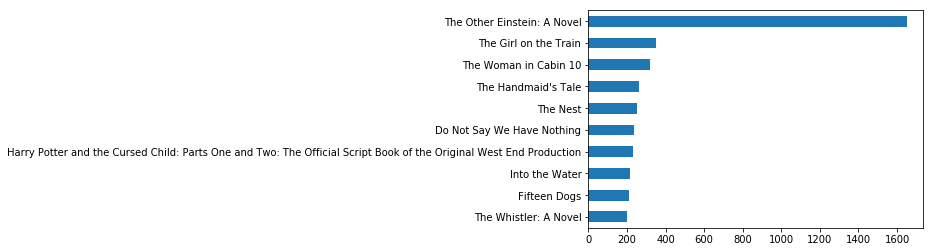

In [91]:
#What are the top 10 most checked out eBook titles in June?
wards_with_branches_csv.Title.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh')

In [90]:
#How many checkouts were there in June for The Other Einstein?
#1653 checkouts for The Other Einstein
wards_with_branches_csv.Title.value_counts()

The Other Einstein: A Novel                                                                                                                                                                                                                     1653
The Girl on the Train                                                                                                                                                                                                                            351
The Woman in Cabin 10                                                                                                                                                                                                                            320
The Handmaid's Tale                                                                                                                                                                                                                              264
The Nest            

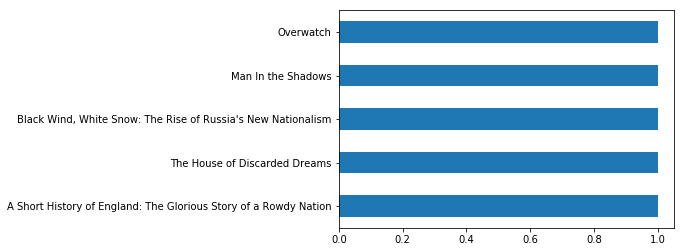

In [97]:
#What are the ten least checked out eBook titles? 
wards_with_branches_csv.Title.value_counts().sort_values(ascending=True).head().plot(kind='barh')

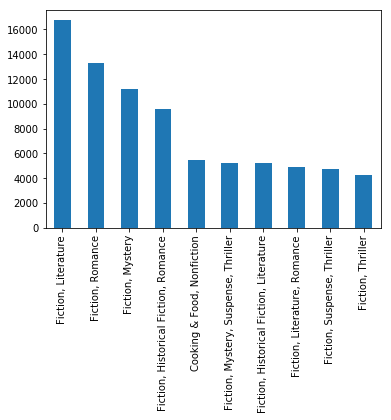

In [88]:
#Most popular genre for ebooks
wards_with_branches_csv.Subject.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

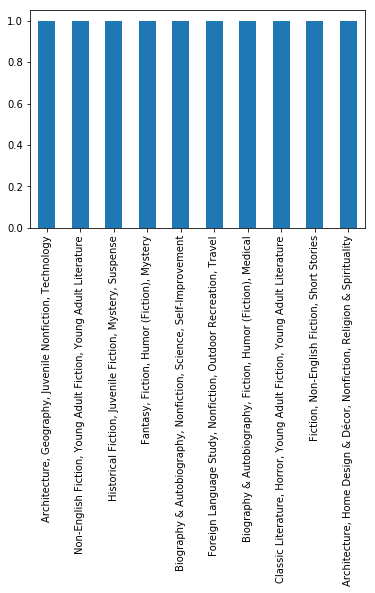

In [95]:
#Least popular genre for ebooks
wards_with_branches_csv.Subject.value_counts().sort_values(ascending=False).tail(10).plot(kind='bar')

In [98]:
#Most popular author in ebooks
wards_with_branches_csv.Creator.value_counts().head(5)

Lonely Planet      2155
Marie Benedict     1653
James Patterson    1637
Nora Roberts       1591
John Grisham       1206
Name: Creator, dtype: int64

In [99]:
#The most popular genre for most wards is the same. The exception is Scarborough-Agincourt
wards_with_branches_csv.groupby("NAME")['Subject'].value_counts().groupby(level=0).nlargest(1)

NAME                          NAME                          Subject                              
Beaches-East York (31)        Beaches-East York (31)        Fiction, Literature                       331
Beaches-East York (32)        Beaches-East York (32)        Fiction, Literature                       719
Davenport (17)                Davenport (17)                Fiction, Romance                          131
Davenport (18)                Davenport (18)                Fiction, Literature                       389
Don Valley East (33)          Don Valley East (33)          Fiction, Romance                          523
Don Valley East (34)          Don Valley East (34)          Fiction, Romance                          153
Don Valley West (25)          Don Valley West (25)          Fiction, Literature                       905
Don Valley West (26)          Don Valley West (26)          Fiction, Literature                       599
Eglinton-Lawrence (15)        Eglinton-Lawrence (15)  

In [100]:
pd.set_option("display.max_rows", 100)
wards_with_branches_csv.dtypes

Title                object
Creator              object
Subject              object
Format               object
Branch               object
Branch No             int64
Branch Code          object
LATITUDE            float64
LONGITUDE           float64
OverDrive Branch     object
Branch Address       object
Branch Telephone     object
TPL_Ward Region      object
NAME                 object
geometry             object
dtype: object

In [101]:
#Change 'Title' to string because it turns out some titles were datetime types
wards_with_branches_csv['Title'].astype(str)

0                                    Truly Madly Guilty
0                                         Turn Me Loose
0                  Twelve Kisses to Midnight: A Novella
0                         Undone: An Unraveling Novella
0     An Unexpected Attraction: Love Unexpected Seri...
0         Unholy Ghosts: Downside Ghosts Series, Book 1
0                                   An Unlikely Romance
0                      Untamed: Medieval Series, Book 1
0                                   The Vanishing Thief
0     Vegan for Her: The Woman's Guide to Being Heal...
0                   Vicar's Daughter to Viscount's Lady
0                  Vicious Cycle: Vicious Cycle, Book 1
0           The Viscount Who Loved Me: The 2nd Epilogue
0           Vision In Silver: The Others Series, Book 3
0                          Voracious: Erotica for Women
0     Wake a Sleeping Tiger: A Novel of the Breeds S...
0                                     Walk Through Fire
0                   Wallbanger: Cocktail Series,

In [102]:
#Code to pull out titles with type of datetime and then drop them
#from datetime import datetime
#only_ebooks['Title'].apply(lambda x: type(x)).unique()

In [103]:
#Top 10 list for each branch
wards_with_branches_csv['Title'] = wards_with_branches_csv['Title'].astype(str)
wards_with_branches_csv.groupby("NAME")['Title'].value_counts().groupby(level=0).nlargest(10)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


NAME                    NAME                    Title                                                                                                                                                     
Beaches-East York (31)  Beaches-East York (31)  The Other Einstein: A Novel                                                                                                                                   29
                                                The Girl on the Train                                                                                                                                         10
                                                The Woman in Cabin 10                                                                                                                                          7
                                                After You: A Novel                                                                                                        

# Creating the coropleth for e-book circulation

In [105]:
#Counting ebook check outs by ward
wards_with_branches_csv['NAME'].value_counts()

Trinity-Spadina (20)            16508
Willowdale (23)                 12504
Parkdale-High Park (13)         12363
Etobicoke-Lakeshore (5)         12142
Don Valley West (25)            11777
Toronto Centre-Rosedale (27)    10683
Toronto-Danforth (30)            8991
St. Paul's (22)                  8873
Beaches-East York (32)           8830
Eglinton-Lawrence (16)           7780
St. Paul's (21)                  7547
Scarborough-Agincourt (40)       7509
Don Valley East (33)             7375
Don Valley West (26)             7059
Eglinton-Lawrence (15)           6980
Scarborough East (44)            6673
Parkdale-High Park (14)          6235
Etobicoke Centre (4)             6087
Beaches-East York (31)           5222
Davenport (18)                   4823
Etobicoke-Lakeshore (6)          4318
Scarborough Southwest (35)       4110
Willowdale (24)                  3919
Toronto-Danforth (29)            3517
Scarborough East (43)            3168
York Centre (10)                 3017
Scarborough 

In [106]:
#Setting the index column for Wards to be "NAME"
wards.set_index('NAME', inplace=True)
wards.head()

CREATE_ID    GEO_ID LCODE_NAME  OBJECTID  \
NAME                                                                     
Scarborough-Rouge River (41)      63519  14630026       EA41         1   
Scarborough East (44)             63519  14630028       EA44         2   
Scarborough-Rouge River (42)      63519  14630024       EA42         3   
Scarborough-Agincourt (39)        63519  14630027       EA39         4   
Willowdale (24)                   63519  14630035       NO24         5   

                             SCODE_NAME  SHAPE_AREA  SHAPE_LEN TYPE_CODE  \
NAME                                                                       
Scarborough-Rouge River (41)         41         0.0        0.0      CITW   
Scarborough East (44)                44         0.0        0.0      CITW   
Scarborough-Rouge River (42)         42         0.0        0.0      CITW   
Scarborough-Agincourt (39)           39         0.0        0.0      CITW   
Willowdale (24)                      24         0.0        0.0      CITW   

                             TYPE_DESC  \
NAME                                     
Scarborough-Rouge River (41)      Ward   
Scarborough East (44)             Ward   
Scarborough-Rouge River (42)      Ward   
Scarborough-Agincourt (39)        Ward   
Willowdale (24)                   Ward   

                                                                       geometry  
NAME                                                                             
Scarborough-Rouge River (41)  POLYGON ((323712.401 4848647.35, 323704.584 48...  
Scarborough East (44)         POLYGON ((331296.368 4846015.756, 331293.471 4...  
Scarborough-Rouge River (42)  POLYGON ((326861.823 4849750.979, 326853.721 4...  
Scarborough-Agincourt (39)    POLYGON ((318351.687 4850141, 318318 4850242, ...  
Willowdale (24)               POLYGON ((313867.121 4846840.841, 313861.781 4...

# Coropleth for e-circulation count

In [114]:
wards

CREATE_ID    GEO_ID LCODE_NAME  OBJECTID  \
NAME                                                                     
Scarborough-Rouge River (41)      63519  14630026       EA41         1   
Scarborough East (44)             63519  14630028       EA44         2   
Scarborough-Rouge River (42)      63519  14630024       EA42         3   
Scarborough-Agincourt (39)        63519  14630027       EA39         4   
Willowdale (24)                   63519  14630035       NO24         5   
Scarborough-Agincourt (40)        63519  14630029       EA40         6   
Don Valley East (33)              63519  14630036       NO33         7   
Willowdale (23)                   63519  14630037       NO23         8   
York West (8)                     63519  14630039       NO08         9   
Scarborough Centre (38)           63519  14630031       EA38        10   
York West (7)                     63519  14630040       WE07        11   
Don Valley East (34)              63519  14630041       NO34        12   
Don Valley West (25)              63519  14630010       NO25        13   
Scarborough East (43)             63519  14630030       EA43        14   
York Centre (10)                  63519  14630038       NO10        15   
York Centre (9)                   63519  14630043       NO09        16   
Scarborough Southwest (36)        63519  14630033       EA36        17   
Scarborough Centre (37)           63519  14630032       EA37        18   
Etobicoke North (1)               63519  14630044       WE01        19   
Eglinton-Lawrence (15)            63519  14630019       NO15        21   
Scarborough Southwest (35)        63519  14630034       EA35        22   
Don Valley West (26)              63519  14630012       NO26        23   
York South-Weston (11)            63519  14630017       WE11        24   
Etobicoke North (2)               63519  14630045       WE02        25   
Toronto-Danforth (29)             63519  14630015       SO29        26   
York South-Weston (12)            63519  14630021       WE12        28   
Beaches-East York (32)            63519  14630016       SO32        29   
Beaches-East York (31)            63519  14630013       SO31        30   
St. Paul's (22)                   63519  14630050       SO22        31   
St. Paul's (21)                   63519  14630020       SO21        32   
Toronto-Danforth (30)             63519  14630052       SO30        33   
Etobicoke Centre (4)              63519  14630046       WE04        34   
Toronto Centre-Rosedale (27)      63519  14630051       SO27        35   
Davenport (18)                    63519  14630056       SO18        36   
Etobicoke Centre (3)              63519  14630047       WE03        38   
Toronto Centre-Rosedale (28)      63519  14630054       SO28        39   
Trinity-Spadina (20)              63519  14630053       SO20        40   
Etobicoke-Lakeshore (5)           63519  14630048       WE05        43   
Etobicoke-Lakeshore (6)           63519  14630049       WE06        44   
Eglinton-Lawrence (16)            63519  14630042       NO16        20   
Parkdale-High Park (14)           66086  14652634       SO14       329   
Parkdale-High Park (13)           66052  14630023       WE13       325   
Trinity-Spadina (19)              66047  14630055       SO19       321   
Davenport (17)                    66055  14653066       WE17       326   

                             SCODE_NAME  SHAPE_AREA  SHAPE_LEN TYPE_CODE  \
NAME                                                                       
Scarborough-Rouge River (41)         41         0.0        0.0      CITW   
Scarborough East (44)                44         0.0        0.0      CITW   
Scarborough-Rouge River (42)         42         0.0        0.0      CITW   
Scarborough-Agincourt (39)           39         0.0        0.0      CITW   
Willowdale (24)                      24         0.0        0.0      CITW   
Scarborough-Agincourt (40)           40         0.0        0.0      CITW   
Don Valley East (

In [112]:
wards.shape

(44, 11)

In [115]:
#2 Branches have NaN values, we need to remove them
wards_clean = wards[wards['ecirculation_count'].notnull()]

In [122]:
wards_clean['ecirculation_count']= wards_clean['ecirculation_count'].astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
wards_clean.dtypes

CREATE_ID               int64
GEO_ID                  int64
LCODE_NAME             object
OBJECTID                int64
SCODE_NAME             object
SHAPE_AREA            float64
SHAPE_LEN             float64
TYPE_CODE              object
TYPE_DESC              object
geometry               object
ecirculation_count      int64
dtype: object

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


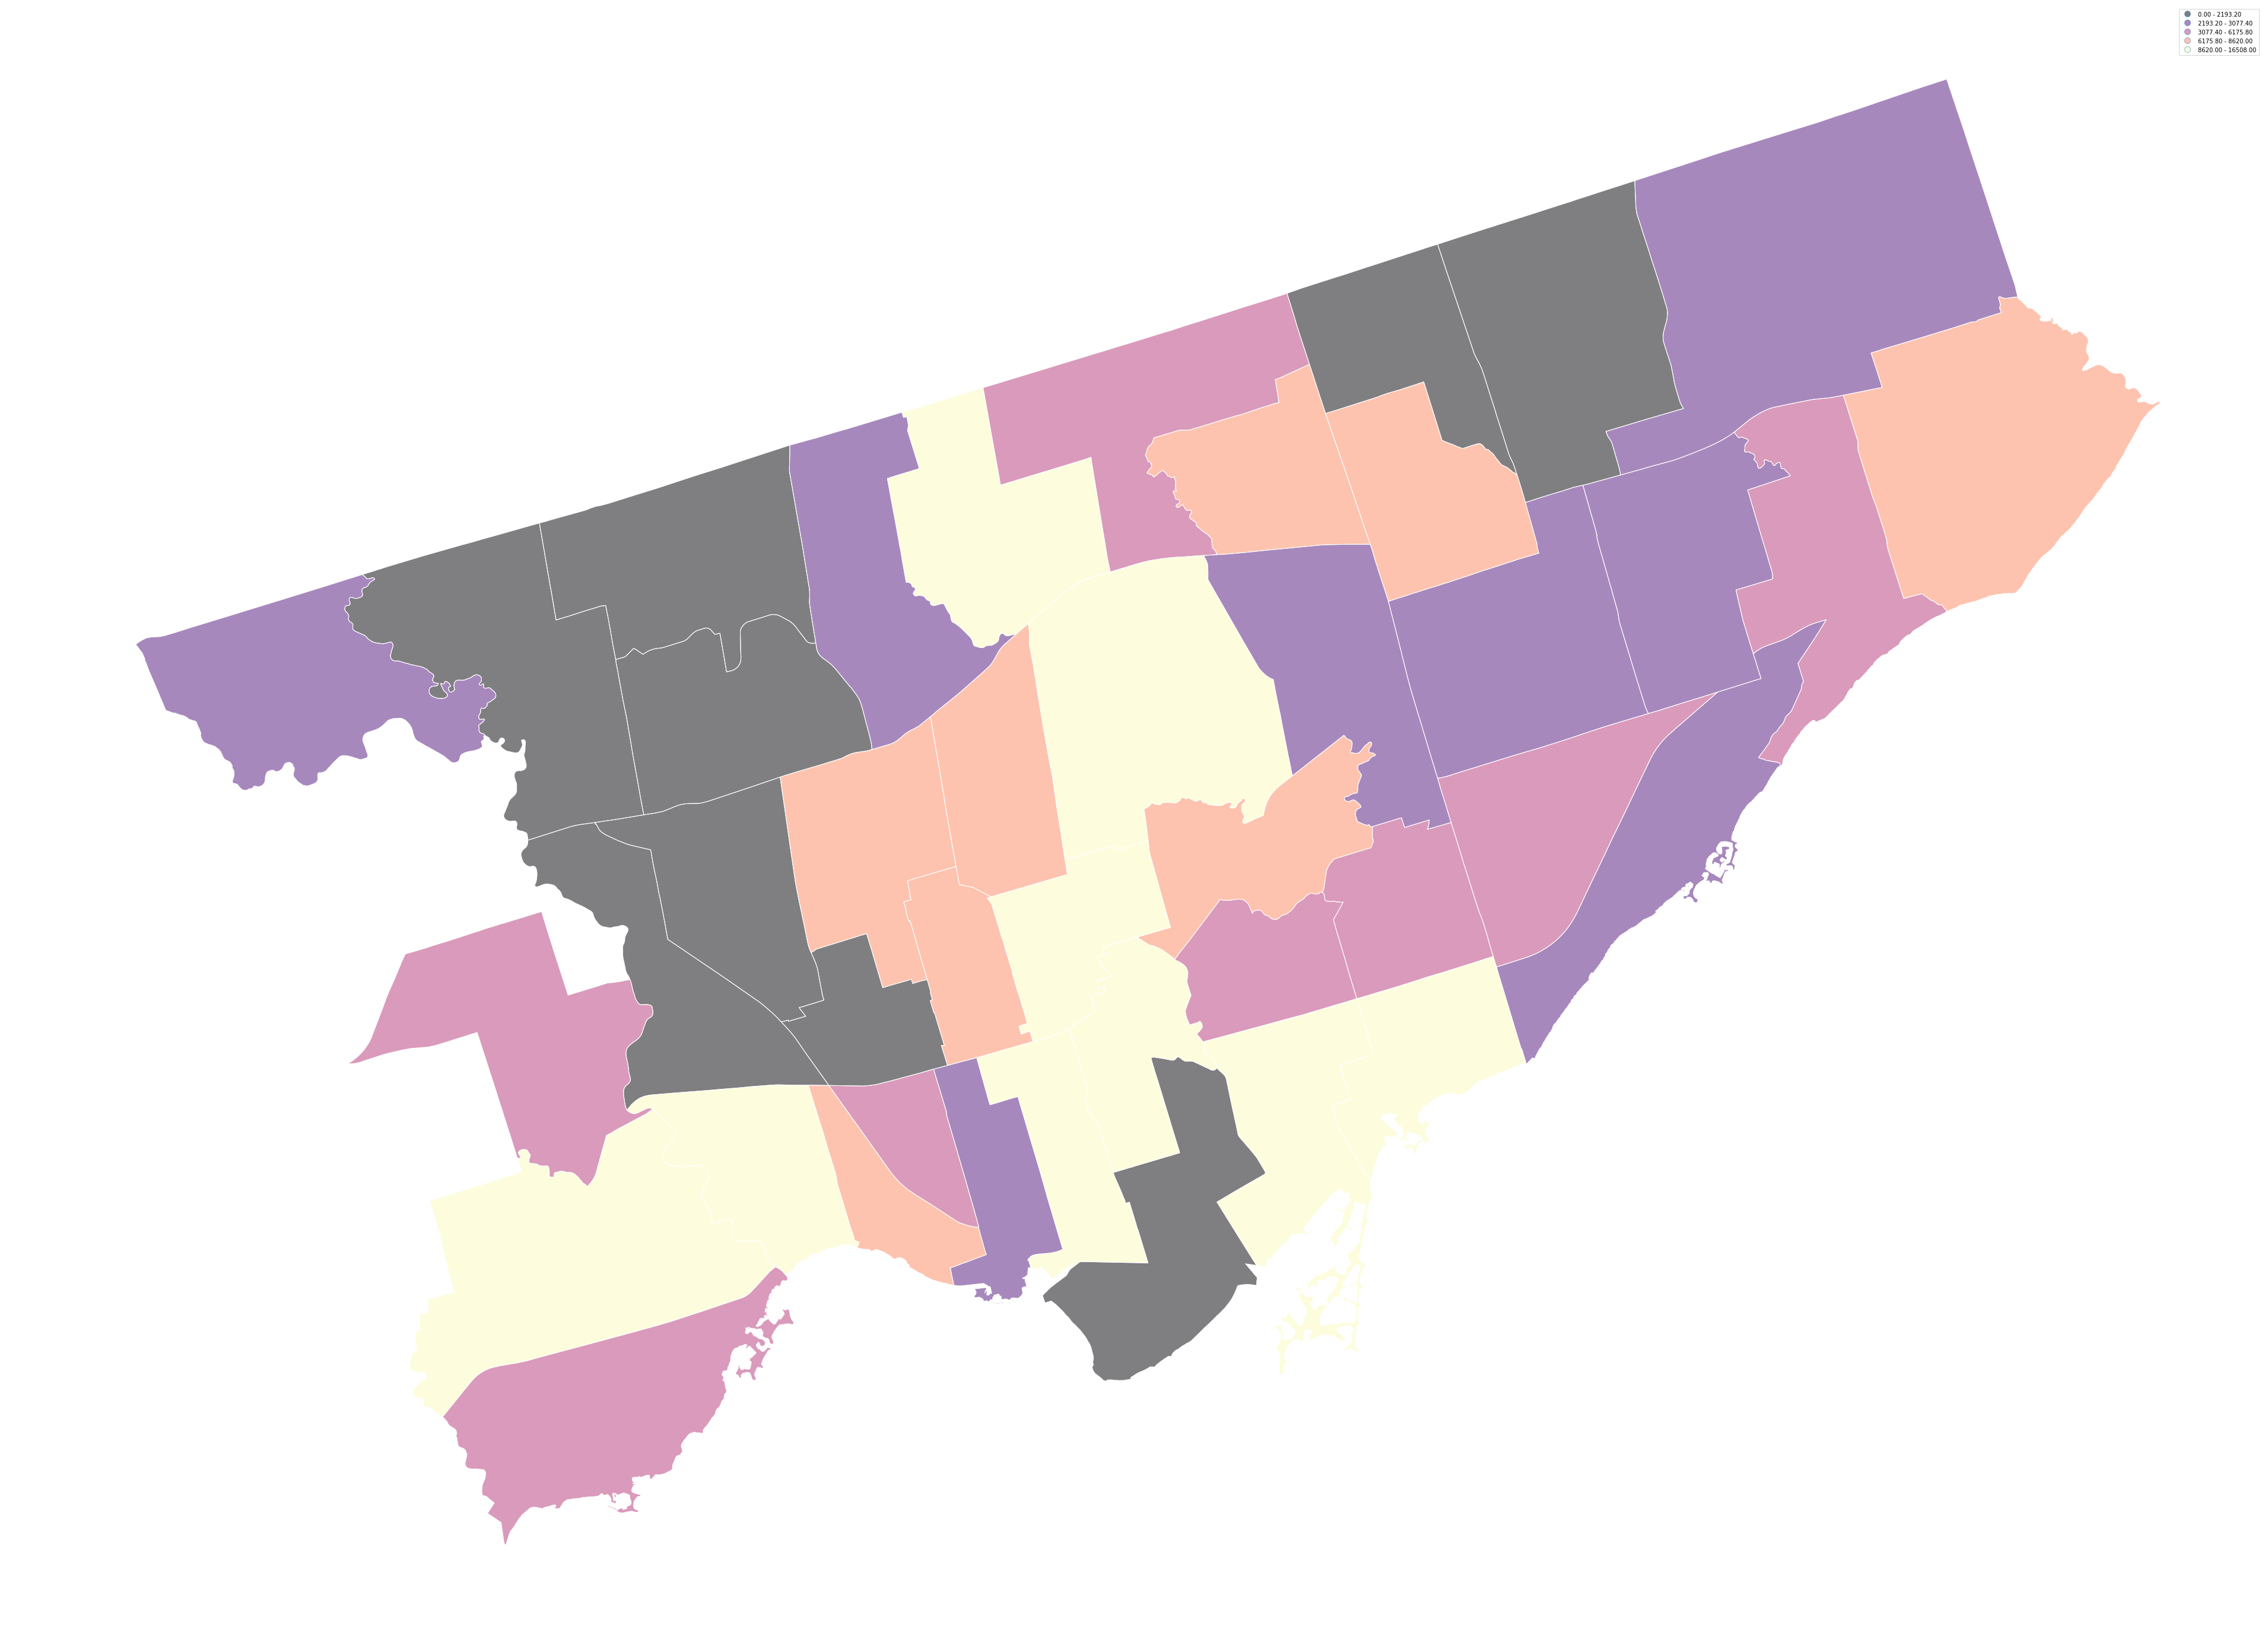

In [139]:
ax = wards_clean.plot(column='ecirculation_count', figsize = (100,50), edgecolor = 'white', linewidth =1, cmap='magma', legend=True, scheme='Quantiles')
ax.axis('off')
ax.legend(fontsize=16)

plt.savefig('ecirculation_in_wards.pdf')

# Coropleth for most popular genre in each ward

In [142]:
wards_with_branches_csv.head()

Title           Creator  \
0                                 Truly Madly Guilty    Liane Moriarty   
0                                      Turn Me Loose      Anne Calhoun   
0               Twelve Kisses to Midnight: A Novella     Karen Hawkins   
0                      Undone: An Unraveling Novella  Elizabeth Norris   
0  An Unexpected Attraction: Love Unexpected Seri...   Delaney Diamond   

                                             Subject Format  \
0                                Fiction, Literature  eBook   
0                         Fiction, Romance, Suspense  eBook   
0               Fiction, Historical Fiction, Romance  eBook   
0  Science Fiction, Short Stories, Young Adult Fi...  eBook   
0                                   Fiction, Romance  eBook   

                                     Branch  Branch No Branch Code   LATITUDE  \
0  Woodside Square (Toronto Public Library)         96          WS  43.810949   
0  Woodside Square (Toronto Public Library)         96          WS  43.810949   
0  Woodside Square (Toronto Public Library)         96          WS  43.810949   
0  Woodside Square (Toronto Public Library)         96          WS  43.810949   
0  Woodside Square (Toronto Public Library)         96          WS  43.810949   

   LONGITUDE                          OverDrive Branch      Branch Address  \
0 -79.270957  Woodside Square (Toronto Public Library)  1571 Sandhurst Cir   
0 -79.270957  Woodside Square (Toronto Public Library)  1571 Sandhurst Cir   
0 -79.270957  Woodside Square (Toronto Public Library)  1571 Sandhurst Cir   
0 -79.270957  Woodside Square (Toronto Public Library)  1571 Sandhurst Cir   
0 -79.270957  Woodside Square (Toronto Public Library)  1571 Sandhurst Cir   

  Branch Telephone          TPL_Ward Region                          NAME  \
0   (416) 396-8979  Scarborough Rouge River  Scarborough-Rouge River (41)   
0   (416) 396-8979  Scarborough Rouge River  Scarborough-Rouge River (41)   
0   (416) 396-8979  Scarborough Rouge River  Scarborough-Rouge River (41)   
0   (416) 396-8979  Scarborough Rouge River  Scarborough-Rouge River (41)   
0   (416) 396-8979  Scarborough Rouge River  Scarborough-Rouge River (41)   

                                            geometry  
0  POLYGON ((323712.401 4848647.35, 323704.584 48...  
0  POLYGON ((323712.401 4848647.35, 323704.584 48...  
0  POLYGON ((323712.401 4848647.35, 323704.584 48...  
0  POLYGON ((323712.401 4848647.35, 323704.584 48...  
0  POLYGON ((323712.401 4848647.35, 323704.584 48...

In [144]:
genres = wards_with_branches_csv.groupby("NAME")['Subject'].value_counts().groupby(level=0).nlargest(1)

In [145]:
genres.shape

(42,)

In [146]:
#Turn genres into a data frame
genres = genres.to_frame()

In [147]:
genres.index

MultiIndex(levels=[['Beaches-East York (31)', 'Beaches-East York (32)', 'Davenport (17)', 'Davenport (18)', 'Don Valley East (33)', 'Don Valley East (34)', 'Don Valley West (25)', 'Don Valley West (26)', 'Eglinton-Lawrence (15)', 'Eglinton-Lawrence (16)', 'Etobicoke Centre (4)', 'Etobicoke North (1)', 'Etobicoke-Lakeshore (5)', 'Etobicoke-Lakeshore (6)', 'Parkdale-High Park (13)', 'Parkdale-High Park (14)', 'Scarborough Centre (37)', 'Scarborough Centre (38)', 'Scarborough East (43)', 'Scarborough East (44)', 'Scarborough Southwest (35)', 'Scarborough Southwest (36)', 'Scarborough-Agincourt (39)', 'Scarborough-Agincourt (40)', 'Scarborough-Rouge River (41)', 'Scarborough-Rouge River (42)', 'St. Paul's (21)', 'St. Paul's (22)', 'Toronto Centre-Rosedale (27)', 'Toronto Centre-Rosedale (28)', 'Toronto-Danforth (29)', 'Toronto-Danforth (30)', 'Trinity-Spadina (19)', 'Trinity-Spadina (20)', 'Willowdale (23)', 'Willowdale (24)', 'York Centre (10)', 'York Centre (9)', 'York South-Weston (11)'

In [148]:
#Remove the index on level 0 (the numbers)
genres = genres.reset_index(level=0)

In [149]:
genres.index

MultiIndex(levels=[['Beaches-East York (31)', 'Beaches-East York (32)', 'Davenport (17)', 'Davenport (18)', 'Don Valley East (33)', 'Don Valley East (34)', 'Don Valley West (25)', 'Don Valley West (26)', 'Eglinton-Lawrence (15)', 'Eglinton-Lawrence (16)', 'Etobicoke Centre (4)', 'Etobicoke North (1)', 'Etobicoke-Lakeshore (5)', 'Etobicoke-Lakeshore (6)', 'Parkdale-High Park (13)', 'Parkdale-High Park (14)', 'Scarborough Centre (37)', 'Scarborough Centre (38)', 'Scarborough East (43)', 'Scarborough East (44)', 'Scarborough Southwest (35)', 'Scarborough Southwest (36)', 'Scarborough-Agincourt (39)', 'Scarborough-Agincourt (40)', 'Scarborough-Rouge River (41)', 'Scarborough-Rouge River (42)', 'St. Paul's (21)', 'St. Paul's (22)', 'Toronto Centre-Rosedale (27)', 'Toronto Centre-Rosedale (28)', 'Toronto-Danforth (29)', 'Toronto-Danforth (30)', 'Trinity-Spadina (19)', 'Trinity-Spadina (20)', 'Willowdale (23)', 'Willowdale (24)', 'York Centre (10)', 'York Centre (9)', 'York South-Weston (11)'

In [151]:
genres.head()

NAME  Subject
NAME                   Subject                                             
Beaches-East York (31) Fiction, Literature  Beaches-East York (31)      331
Beaches-East York (32) Fiction, Literature  Beaches-East York (32)      719
Davenport (17)         Fiction, Romance             Davenport (17)      131
Davenport (18)         Fiction, Literature          Davenport (18)      389
Don Valley East (33)   Fiction, Romance       Don Valley East (33)      523

In [152]:
#Rename my columns
genres = genres.rename(columns={'Subject':'genre_count'})

In [153]:
#Remove the index on level 1 (Subject)
genres = genres.reset_index(level=1)

In [154]:
genres.head()

Subject                    NAME  \
NAME                                                                  
Beaches-East York (31)  Fiction, Literature  Beaches-East York (31)   
Beaches-East York (32)  Fiction, Literature  Beaches-East York (32)   
Davenport (17)             Fiction, Romance          Davenport (17)   
Davenport (18)          Fiction, Literature          Davenport (18)   
Don Valley East (33)       Fiction, Romance    Don Valley East (33)   

                        genre_count  
NAME                                 
Beaches-East York (31)          331  
Beaches-East York (32)          719  
Davenport (17)                  131  
Davenport (18)                  389  
Don Valley East (33)            523

In [155]:
wards

CREATE_ID    GEO_ID LCODE_NAME  OBJECTID  \
NAME                                                                     
Scarborough-Rouge River (41)      63519  14630026       EA41         1   
Scarborough East (44)             63519  14630028       EA44         2   
Scarborough-Rouge River (42)      63519  14630024       EA42         3   
Scarborough-Agincourt (39)        63519  14630027       EA39         4   
Willowdale (24)                   63519  14630035       NO24         5   
Scarborough-Agincourt (40)        63519  14630029       EA40         6   
Don Valley East (33)              63519  14630036       NO33         7   
Willowdale (23)                   63519  14630037       NO23         8   
York West (8)                     63519  14630039       NO08         9   
Scarborough Centre (38)           63519  14630031       EA38        10   
York West (7)                     63519  14630040       WE07        11   
Don Valley East (34)              63519  14630041       NO34        12   
Don Valley West (25)              63519  14630010       NO25        13   
Scarborough East (43)             63519  14630030       EA43        14   
York Centre (10)                  63519  14630038       NO10        15   
York Centre (9)                   63519  14630043       NO09        16   
Scarborough Southwest (36)        63519  14630033       EA36        17   
Scarborough Centre (37)           63519  14630032       EA37        18   
Etobicoke North (1)               63519  14630044       WE01        19   
Eglinton-Lawrence (15)            63519  14630019       NO15        21   
Scarborough Southwest (35)        63519  14630034       EA35        22   
Don Valley West (26)              63519  14630012       NO26        23   
York South-Weston (11)            63519  14630017       WE11        24   
Etobicoke North (2)               63519  14630045       WE02        25   
Toronto-Danforth (29)             63519  14630015       SO29        26   
York South-Weston (12)            63519  14630021       WE12        28   
Beaches-East York (32)            63519  14630016       SO32        29   
Beaches-East York (31)            63519  14630013       SO31        30   
St. Paul's (22)                   63519  14630050       SO22        31   
St. Paul's (21)                   63519  14630020       SO21        32   
Toronto-Danforth (30)             63519  14630052       SO30        33   
Etobicoke Centre (4)              63519  14630046       WE04        34   
Toronto Centre-Rosedale (27)      63519  14630051       SO27        35   
Davenport (18)                    63519  14630056       SO18        36   
Etobicoke Centre (3)              63519  14630047       WE03        38   
Toronto Centre-Rosedale (28)      63519  14630054       SO28        39   
Trinity-Spadina (20)              63519  14630053       SO20        40   
Etobicoke-Lakeshore (5)           63519  14630048       WE05        43   
Etobicoke-Lakeshore (6)           63519  14630049       WE06        44   
Eglinton-Lawrence (16)            63519  14630042       NO16        20   
Parkdale-High Park (14)           66086  14652634       SO14       329   
Parkdale-High Park (13)           66052  14630023       WE13       325   
Trinity-Spadina (19)              66047  14630055       SO19       321   
Davenport (17)                    66055  14653066       WE17       326   

                             SCODE_NAME  SHAPE_AREA  SHAPE_LEN TYPE_CODE  \
NAME                                                                       
Scarborough-Rouge River (41)         41         0.0        0.0      CITW   
Scarborough East (44)                44         0.0        0.0      CITW   
Scarborough-Rouge River (42)         42         0.0        0.0      CITW   
Scarborough-Agincourt (39)           39         0.0        0.0      CITW   
Willowdale (24)                      24         0.0        0.0      CITW   
Scarborough-Agincourt (40)           40         0.0        0.0      CITW   
Don Valley East (

In [156]:
#Because I need to merge on NAME, I need to reset the index on wards
wards = wards.reset_index()

In [157]:
wards_with_genres = wards.merge(genres, on="NAME")
wards_with_genres

NAME  CREATE_ID    GEO_ID LCODE_NAME  OBJECTID  \
0   Scarborough-Rouge River (41)      63519  14630026       EA41         1   
1          Scarborough East (44)      63519  14630028       EA44         2   
2   Scarborough-Rouge River (42)      63519  14630024       EA42         3   
3     Scarborough-Agincourt (39)      63519  14630027       EA39         4   
4                Willowdale (24)      63519  14630035       NO24         5   
5     Scarborough-Agincourt (40)      63519  14630029       EA40         6   
6           Don Valley East (33)      63519  14630036       NO33         7   
7                Willowdale (23)      63519  14630037       NO23         8   
8                  York West (8)      63519  14630039       NO08         9   
9        Scarborough Centre (38)      63519  14630031       EA38        10   
10                 York West (7)      63519  14630040       WE07        11   
11          Don Valley East (34)      63519  14630041       NO34        12   
12          Don Valley West (25)      63519  14630010       NO25        13   
13         Scarborough East (43)      63519  14630030       EA43        14   
14              York Centre (10)      63519  14630038       NO10        15   
15               York Centre (9)      63519  14630043       NO09        16   
16    Scarborough Southwest (36)      63519  14630033       EA36        17   
17       Scarborough Centre (37)      63519  14630032       EA37        18   
18           Etobicoke North (1)      63519  14630044       WE01        19   
19        Eglinton-Lawrence (15)      63519  14630019       NO15        21   
20    Scarborough Southwest (35)      63519  14630034       EA35        22   
21          Don Valley West (26)      63519  14630012       NO26        23   
22        York South-Weston (11)      63519  14630017       WE11        24   
23         Toronto-Danforth (29)      63519  14630015       SO29        26   
24        York South-Weston (12)      63519  14630021       WE12        28   
25        Beaches-East York (32)      63519  14630016       SO32        29   
26        Beaches-East York (31)      63519  14630013       SO31        30   
27               St. Paul's (22)      63519  14630050       SO22        31   
28               St. Paul's (21)      63519  14630020       SO21        32   
29         Toronto-Danforth (30)      63519  14630052       SO30        33   
30          Etobicoke Centre (4)      63519  14630046       WE04        34   
31  Toronto Centre-Rosedale (27)      63519  14630051       SO27        35   
32                Davenport (18)      63519  14630056       SO18        36   
33  Toronto Centre-Rosedale (28)      63519  14630054       SO28        39   
34          Trinity-Spadina (20)      63519  14630053       SO20        40   
35       Etobicoke-Lakeshore (5)      63519  14630048       WE05        43   
36       Etobicoke-Lakeshore (6)      63519  14630049       WE06        44   
37        Eglinton-Lawrence (16)      63519  14630042       NO16        20   
38       Parkdale-High Park (14)      66086  14652634       SO14       329   
39       Parkdale-High Park (13)      66052  14630023       WE13       325   
40          Trinity-Spadina (19)      66047  14630055       SO19       321   
41                Davenport (17)      66055  14653066       WE17       326   

   SCODE_NAME  SHAPE_AREA  SHAPE_LEN TYPE_CODE TYPE_DESC  \
0          41         0.0        0.0      CITW      Ward   
1          44         0.0        0.0      CITW      Ward   
2          42         0.0        0.0      CITW      Ward   
3          39         0.0        0.0      CITW      Ward   
4          24         0.0        0.0      CITW      Ward   
5          40         0.0        0.0      CITW      Ward   
6          33         0.0        0.0      CITW      Ward   
7          23         0.0        0.0      CITW      Ward   
8          08         0.0        0.0      CITW      Ward   
9          38         0.0        0.0      CITW      Ward   
10         07

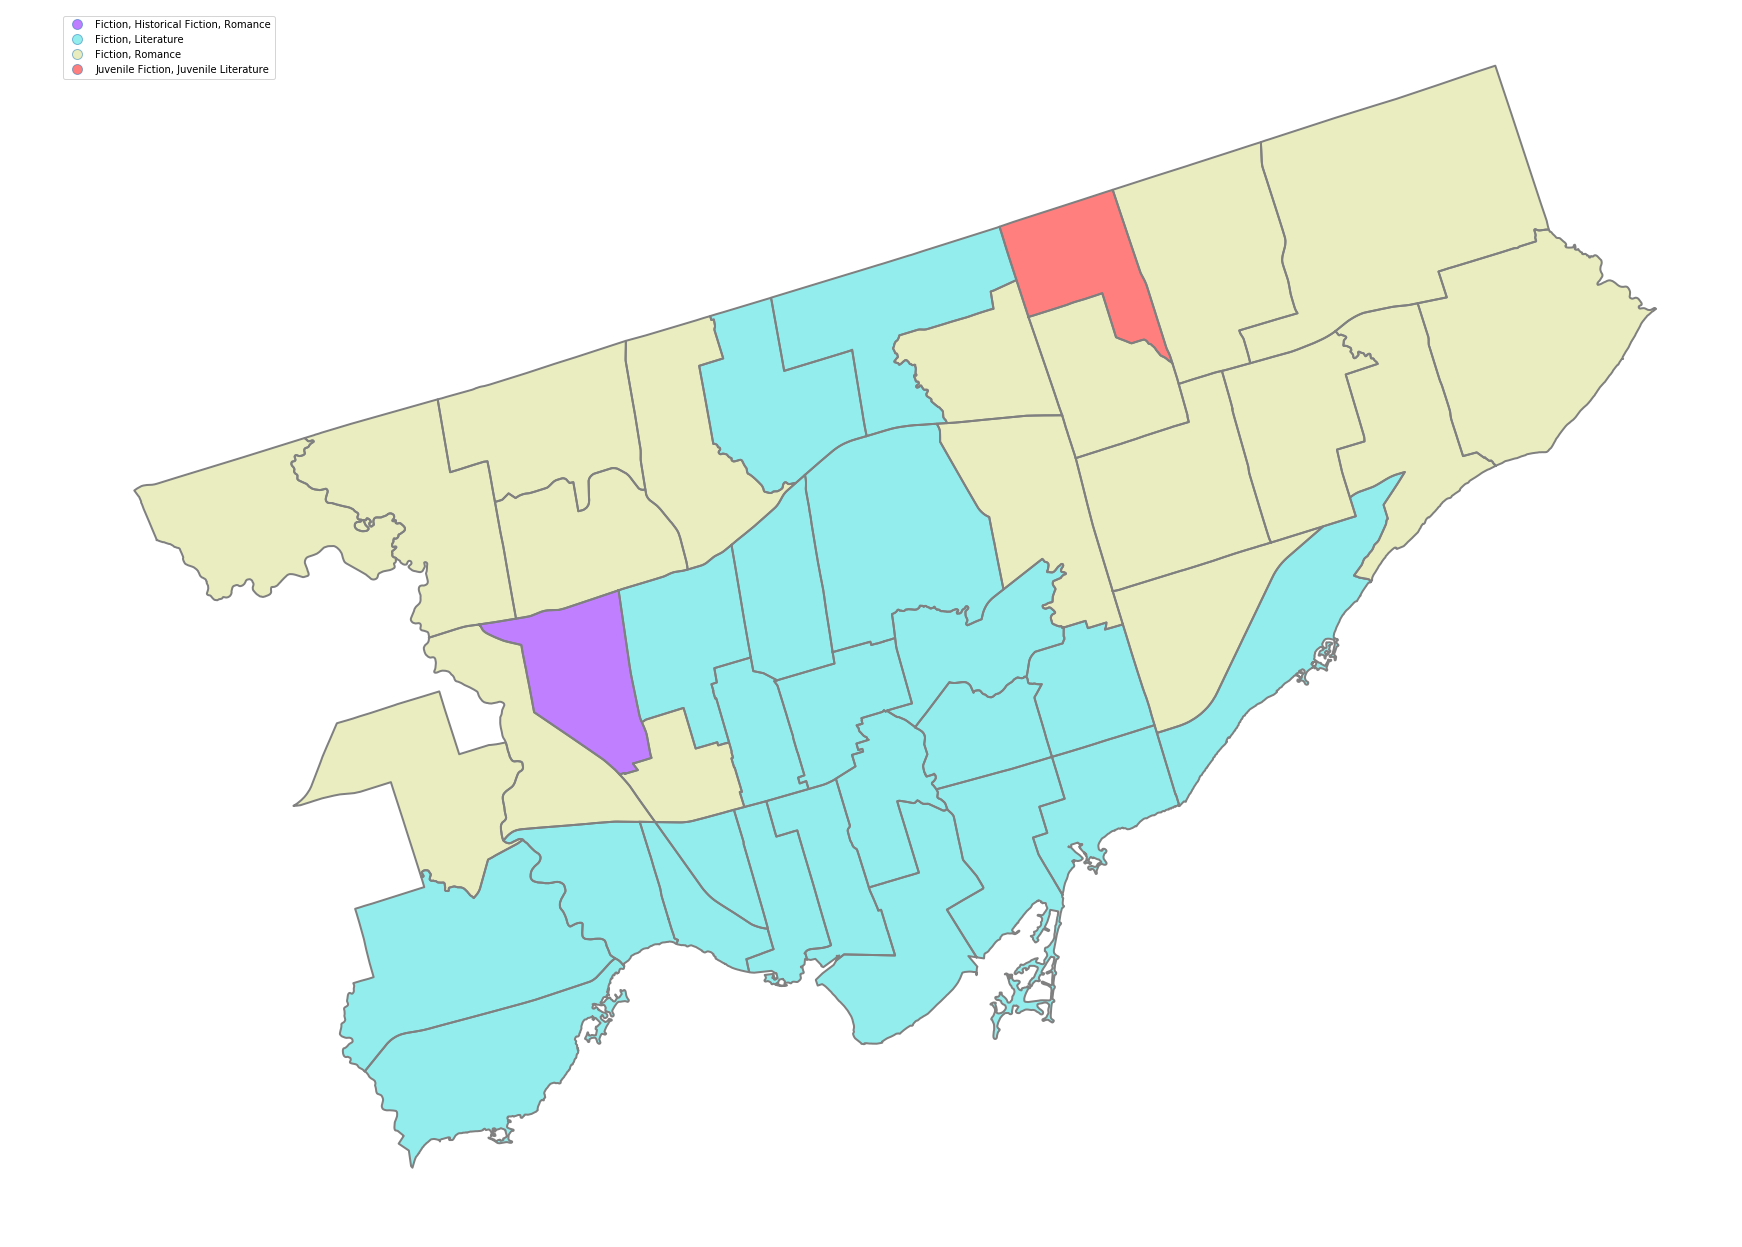

In [158]:
ax = wards_with_genres.plot(column='Subject', figsize = (30,50), edgecolor = 'grey', linewidth =2, cmap='rainbow', legend=True)
ax.axis('off')

plt.savefig('popular_genres_in_wards.pdf')

# Coropleth for most popular title in each ward

In [165]:
wards_with_branches_csv['Title'] = wards_with_branches_csv['Title'].astype(str)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
wards_with_branches_csv

Title               Creator  \
0                                  Truly Madly Guilty        Liane Moriarty   
0                                       Turn Me Loose          Anne Calhoun   
0                Twelve Kisses to Midnight: A Novella         Karen Hawkins   
0                       Undone: An Unraveling Novella      Elizabeth Norris   
0   An Unexpected Attraction: Love Unexpected Seri...       Delaney Diamond   
0       Unholy Ghosts: Downside Ghosts Series, Book 1           Stacia Kane   
0                                 An Unlikely Romance           Betty Neels   
0                    Untamed: Medieval Series, Book 1      Elizabeth Lowell   
0                                 The Vanishing Thief           Kate Parker   
0   Vegan for Her: The Woman's Guide to Being Heal...      Virginia Messina   
0                 Vicar's Daughter to Viscount's Lady          Louise Allen   
0                Vicious Cycle: Vicious Cycle, Book 1          Katie Ashley   
0         The Viscount Who Loved Me: The 2nd Epilogue           Julia Quinn   
0         Vision In Silver: The Others Series, Book 3           Anne Bishop   
0                        Voracious: Erotica for Women           Violet Blue   
0   Wake a Sleeping Tiger: A Novel of the Breeds S...            Lora Leigh   
0                                   Walk Through Fire        Kristen Ashley   
0                 Wallbanger: Cocktail Series, Book 1         Alice Clayton   
0        Warheart: Richard and Kahlan Series, Book 15        Terry Goodkind   
0                        The Way of a Man with a Maid             Anonymous   
0   The Way You Love Me: Grayson Friends Series, B...           Francis Ray   
0                                       We the Living              Ayn Rand   
0                                    Weaving Rag Rugs           Tom Knisely   
0   The Wedding Chase: In His Lordship's Bed\Priso...        Kasey Michaels   
0                                  The Wedding Clause         Alexandra Ivy   
0                                     A Weekend Visit             Anonymous   
0                                   What Alice Forgot        Liane Moriarty   
0    What Price Love?: Cynster Family Series, Book 14     STEPHANIE LAURENS   
0                             When Breath Becomes Air        Paul Kalanithi   
0                                    When May Follows           Betty Neels   
0   Phoenix Claws and Jade Trees: Essential Techni...          Kian Lam Kho   
0                           When You Wish Upon a Duke     Isabella Bradford   
0   The Pirate Hunter's Lady: Regency Pirates Seri...       Jennifer Ashley   
0   The Pizza Bible: The World's Favorite Pizza St...        Tony Gemignani   
0   Plant Power: Transform Your Kitchen, Plate, an...            Nava Atlas   
0      Playing with Fire: Phoenix Fire Series, Book 3          Cynthia Eden   
0                             Pleasured by the Viking   Michelle Willingham   
0   Pocket Full of Posies: Lana Harvey, Reapers In...         Angela Roquet   
0        Point Deception: Cape Perdido Series, Book 1         Marcia Muller   
0   Point of Contact: Jack Ryan Universe Series, B...            Mike Maden   
0                                               Polly           Betty Neels   
0        The Rules: The Johnson Family Series, Book 4       Delaney Diamond   
0   Rules of Engagement: The Reasons for Marriage\...     STEPHANIE LAURENS   
0                                  Safe Word: A Novel    Molly Weatherfield   
0   Samantha the Swimming Fairy: Rainbow Magic: Th...         Daisy Meadows   
0                          San Francisco Travel Guide         Lonely Planet   
0                                The Sapphire Pendant           Dara Girard   
0                                The Sapphire Pendant           Dara Girard   
0             Say You Will: Summerhill Series, Book 1            Kate Perry   
0   The Science of Why: Answers to Questions About...            Jay Ingram   
..                 

In [172]:
titles = wards_with_branches_csv.groupby("NAME")['Title'].value_counts().groupby(level=0).nlargest(1)

In [173]:
titles

NAME                          NAME                          Title                                                                                                             
Beaches-East York (31)        Beaches-East York (31)        The Other Einstein: A Novel                                                                                            29
Beaches-East York (32)        Beaches-East York (32)        The Other Einstein: A Novel                                                                                            68
Davenport (17)                Davenport (17)                The Other Einstein: A Novel                                                                                            12
Davenport (18)                Davenport (18)                The Other Einstein: A Novel                                                                                            22
Don Valley East (33)          Don Valley East (33)          The Other Einstein: A Novel          

In [174]:
#Turn titles into a data frame
titles = titles.to_frame()

In [175]:
titles

Title
NAME                         NAME                         Title                                                    
Beaches-East York (31)       Beaches-East York (31)       The Other Einstein: A Novel                            29
Beaches-East York (32)       Beaches-East York (32)       The Other Einstein: A Novel                            68
Davenport (17)               Davenport (17)               The Other Einstein: A Novel                            12
Davenport (18)               Davenport (18)               The Other Einstein: A Novel                            22
Don Valley East (33)         Don Valley East (33)         The Other Einstein: A Novel                            63
Don Valley East (34)         Don Valley East (34)         The Other Einstein: A Novel                            13
Don Valley West (25)         Don Valley West (25)         The Other Einstein: A Novel                            95
Don Valley West (26)         Don Valley West (26)         The Other Einstein: A Novel                            58
Eglinton-Lawrence (15)       Eglinton-Lawrence (15)       The Other Einstein: A Novel                            51
Eglinton-Lawrence (16)       Eglinton-Lawrence (16)       The Other Einstein: A Novel                            66
Etobicoke Centre (4)         Etobicoke Centre (4)         The Other Einstein: A Novel                            55
Etobicoke North (1)          Etobicoke North (1)          The Other Einstein: A Novel                            17
Etobicoke-Lakeshore (5)      Etobicoke-Lakeshore (5)      The Other Einstein: A Novel                           100
Etobicoke-Lakeshore (6)      Etobicoke-Lakeshore (6)      The Other Einstein: A Novel                            32
Parkdale-High Park (13)      Parkdale-High Park (13)      The Other Einstein: A Novel                           106
Parkdale-High Park (14)      Parkdale-High Park (14)      The Other Einstein: A Novel                            47
Scarborough Centre (37)      Scarborough Centre (37)      The Other Einstein: A Novel                            12
Scarborough Centre (38)      Scarborough Centre (38)      The Other Einstein: A Novel                            10
Scarborough East (43)        Scarborough East (43)        The Other Einstein: A Novel                            13
Scarborough East (44)        Scarborough East (44)        The Other Einstein: A Novel                            44
Scarborough Southwest (35)   Scarborough Southwest (35)   The Other Einstein: A Novel                            34
Scarborough Southwest (36)   Scarborough Southwest (36)   The Other Einstein: A Novel                            29
Scarborough-Agincourt (39)   Scarborough-Agincourt (39)   Harry Potter and the Cursed Child: Parts One an...      4
Scarborough-Agincourt (40)   Scarborough-Agincourt (40)   The Other Einstein: A Novel                            30
Scarborough-Rouge River (41) Scarborough-Rouge River (41) Harry Potter and the Cursed Child: Parts One an...      6
Scarborough-Rouge River (42) Scarborough-Rouge River (42) The Other Einstein: A Novel                             8
St. Paul's (21)              St. Paul's (21)              The Other Einstein: A Novel                            72
St. Paul's (22)              St. Paul's (22)              The Other Einstein: A Novel                            94
Toronto Centre-Rosedale (27) Toronto Centre-Rosedale (27) The Other Einstein: A Novel                            63
Toronto Centre-Rosedale (28) Toronto Centre-Rosedale (28) The Other Einstein: A Novel                            12
Toronto-Danforth (29)        Toronto-Danforth (29)        The Other Einstein: A Novel                            29
Toronto-Danforth (30)        Toronto-Danforth (30)        The Other Einstein: A Novel                            58
Trinity-Spadina (19)         Trinity-Spadina (19)         The Other Einstein: A Novel                            12
Trinity-Spadina (20)         Trinity-Spadina (20) 

In [176]:
titles = titles.rename(columns={'Title':'title_count'})
titles.head()

title_count
NAME                   NAME                   Title                                   
Beaches-East York (31) Beaches-East York (31) The Other Einstein: A Novel           29
Beaches-East York (32) Beaches-East York (32) The Other Einstein: A Novel           68
Davenport (17)         Davenport (17)         The Other Einstein: A Novel           12
Davenport (18)         Davenport (18)         The Other Einstein: A Novel           22
Don Valley East (33)   Don Valley East (33)   The Other Einstein: A Novel           63

In [178]:
titles.index

MultiIndex(levels=[['Beaches-East York (31)', 'Beaches-East York (32)', 'Davenport (17)', 'Davenport (18)', 'Don Valley East (33)', 'Don Valley East (34)', 'Don Valley West (25)', 'Don Valley West (26)', 'Eglinton-Lawrence (15)', 'Eglinton-Lawrence (16)', 'Etobicoke Centre (4)', 'Etobicoke North (1)', 'Etobicoke-Lakeshore (5)', 'Etobicoke-Lakeshore (6)', 'Parkdale-High Park (13)', 'Parkdale-High Park (14)', 'Scarborough Centre (37)', 'Scarborough Centre (38)', 'Scarborough East (43)', 'Scarborough East (44)', 'Scarborough Southwest (35)', 'Scarborough Southwest (36)', 'Scarborough-Agincourt (39)', 'Scarborough-Agincourt (40)', 'Scarborough-Rouge River (41)', 'Scarborough-Rouge River (42)', 'St. Paul's (21)', 'St. Paul's (22)', 'Toronto Centre-Rosedale (27)', 'Toronto Centre-Rosedale (28)', 'Toronto-Danforth (29)', 'Toronto-Danforth (30)', 'Trinity-Spadina (19)', 'Trinity-Spadina (20)', 'Willowdale (23)', 'Willowdale (24)', 'York Centre (10)', 'York Centre (9)', 'York South-Weston (11)'

In [177]:
titles = titles.reset_index(level=1)

In [179]:
titles.index

MultiIndex(levels=[['Beaches-East York (31)', 'Beaches-East York (32)', 'Davenport (17)', 'Davenport (18)', 'Don Valley East (33)', 'Don Valley East (34)', 'Don Valley West (25)', 'Don Valley West (26)', 'Eglinton-Lawrence (15)', 'Eglinton-Lawrence (16)', 'Etobicoke Centre (4)', 'Etobicoke North (1)', 'Etobicoke-Lakeshore (5)', 'Etobicoke-Lakeshore (6)', 'Parkdale-High Park (13)', 'Parkdale-High Park (14)', 'Scarborough Centre (37)', 'Scarborough Centre (38)', 'Scarborough East (43)', 'Scarborough East (44)', 'Scarborough Southwest (35)', 'Scarborough Southwest (36)', 'Scarborough-Agincourt (39)', 'Scarborough-Agincourt (40)', 'Scarborough-Rouge River (41)', 'Scarborough-Rouge River (42)', 'St. Paul's (21)', 'St. Paul's (22)', 'Toronto Centre-Rosedale (27)', 'Toronto Centre-Rosedale (28)', 'Toronto-Danforth (29)', 'Toronto-Danforth (30)', 'Trinity-Spadina (19)', 'Trinity-Spadina (20)', 'Willowdale (23)', 'Willowdale (24)', 'York Centre (10)', 'York Centre (9)', 'York South-Weston (11)'

In [181]:
titles = titles.reset_index(level=1)

In [182]:
titles

Title  \
NAME                                                                              
Beaches-East York (31)                              The Other Einstein: A Novel   
Beaches-East York (32)                              The Other Einstein: A Novel   
Davenport (17)                                      The Other Einstein: A Novel   
Davenport (18)                                      The Other Einstein: A Novel   
Don Valley East (33)                                The Other Einstein: A Novel   
Don Valley East (34)                                The Other Einstein: A Novel   
Don Valley West (25)                                The Other Einstein: A Novel   
Don Valley West (26)                                The Other Einstein: A Novel   
Eglinton-Lawrence (15)                              The Other Einstein: A Novel   
Eglinton-Lawrence (16)                              The Other Einstein: A Novel   
Etobicoke Centre (4)                                The Other Einstein: A Novel   
Etobicoke North (1)                                 The Other Einstein: A Novel   
Etobicoke-Lakeshore (5)                             The Other Einstein: A Novel   
Etobicoke-Lakeshore (6)                             The Other Einstein: A Novel   
Parkdale-High Park (13)                             The Other Einstein: A Novel   
Parkdale-High Park (14)                             The Other Einstein: A Novel   
Scarborough Centre (37)                             The Other Einstein: A Novel   
Scarborough Centre (38)                             The Other Einstein: A Novel   
Scarborough East (43)                               The Other Einstein: A Novel   
Scarborough East (44)                               The Other Einstein: A Novel   
Scarborough Southwest (35)                          The Other Einstein: A Novel   
Scarborough Southwest (36)                          The Other Einstein: A Novel   
Scarborough-Agincourt (39)    Harry Potter and the Cursed Child: Parts One a...   
Scarborough-Agincourt (40)                          The Other Einstein: A Novel   
Scarborough-Rouge River (41)  Harry Potter and the Cursed Child: Parts One a...   
Scarborough-Rouge River (42)                        The Other Einstein: A Novel   
St. Paul's (21)                                     The Other Einstein: A Novel   
St. Paul's (22)                                     The Other Einstein: A Novel   
Toronto Centre-Rosedale (27)                        The Other Einstein: A Novel   
Toronto Centre-Rosedale (28)                        The Other Einstein: A Novel   
Toronto-Danforth (29)                               The Other Einstein: A Novel   
Toronto-Danforth (30)                               The Other Einstein: A Novel   
Trinity-Spadina (19)                                The Other Einstein: A Novel   
Trinity-Spadina (20)                                The Other Einstein: A Novel   
Willowdale (23)                                     The Other Einstein: A Novel   
Willowdale (24)                                     The Other Einstein: A Novel   
York Centre (10)                                    The Other Einstein: A Novel   
York Centre (9)                                     The Other Einstein: A Novel   
York South-Weston (11)                              The Other Einstein: A Novel   
York South-Weston (12)                                      Deep Kiss of Winter   
York West (7)                                       The Other Einstein: A Novel   
York West (8)                 Enslaved: Erotic Adventures of Jane in the Jun...   

                                                      NAME  title_count  
NAME                                                                     
Beaches-East York (31)              Beaches-East York (31)           29  
Beaches-East York (32)              Beaches-East York (32)           68  
Davenport (17)                              Davenport (17)           12  
Davenport (18)                              Davenpo

In [183]:
wards_with_titles = wards.merge(titles, on='NAME')

In [184]:
wards_with_titles

NAME  CREATE_ID    GEO_ID LCODE_NAME  OBJECTID  \
0   Scarborough-Rouge River (41)      63519  14630026       EA41         1   
1          Scarborough East (44)      63519  14630028       EA44         2   
2   Scarborough-Rouge River (42)      63519  14630024       EA42         3   
3     Scarborough-Agincourt (39)      63519  14630027       EA39         4   
4                Willowdale (24)      63519  14630035       NO24         5   
5     Scarborough-Agincourt (40)      63519  14630029       EA40         6   
6           Don Valley East (33)      63519  14630036       NO33         7   
7                Willowdale (23)      63519  14630037       NO23         8   
8                  York West (8)      63519  14630039       NO08         9   
9        Scarborough Centre (38)      63519  14630031       EA38        10   
10                 York West (7)      63519  14630040       WE07        11   
11          Don Valley East (34)      63519  14630041       NO34        12   
12          Don Valley West (25)      63519  14630010       NO25        13   
13         Scarborough East (43)      63519  14630030       EA43        14   
14              York Centre (10)      63519  14630038       NO10        15   
15               York Centre (9)      63519  14630043       NO09        16   
16    Scarborough Southwest (36)      63519  14630033       EA36        17   
17       Scarborough Centre (37)      63519  14630032       EA37        18   
18           Etobicoke North (1)      63519  14630044       WE01        19   
19        Eglinton-Lawrence (15)      63519  14630019       NO15        21   
20    Scarborough Southwest (35)      63519  14630034       EA35        22   
21          Don Valley West (26)      63519  14630012       NO26        23   
22        York South-Weston (11)      63519  14630017       WE11        24   
23         Toronto-Danforth (29)      63519  14630015       SO29        26   
24        York South-Weston (12)      63519  14630021       WE12        28   
25        Beaches-East York (32)      63519  14630016       SO32        29   
26        Beaches-East York (31)      63519  14630013       SO31        30   
27               St. Paul's (22)      63519  14630050       SO22        31   
28               St. Paul's (21)      63519  14630020       SO21        32   
29         Toronto-Danforth (30)      63519  14630052       SO30        33   
30          Etobicoke Centre (4)      63519  14630046       WE04        34   
31  Toronto Centre-Rosedale (27)      63519  14630051       SO27        35   
32                Davenport (18)      63519  14630056       SO18        36   
33  Toronto Centre-Rosedale (28)      63519  14630054       SO28        39   
34          Trinity-Spadina (20)      63519  14630053       SO20        40   
35       Etobicoke-Lakeshore (5)      63519  14630048       WE05        43   
36       Etobicoke-Lakeshore (6)      63519  14630049       WE06        44   
37        Eglinton-Lawrence (16)      63519  14630042       NO16        20   
38       Parkdale-High Park (14)      66086  14652634       SO14       329   
39       Parkdale-High Park (13)      66052  14630023       WE13       325   
40          Trinity-Spadina (19)      66047  14630055       SO19       321   
41                Davenport (17)      66055  14653066       WE17       326   

   SCODE_NAME  SHAPE_AREA  SHAPE_LEN TYPE_CODE TYPE_DESC  \
0          41         0.0        0.0      CITW      Ward   
1          44         0.0        0.0      CITW      Ward   
2          42         0.0        0.0      CITW      Ward   
3          39         0.0        0.0      CITW      Ward   
4          24         0.0        0.0      CITW      Ward   
5          40         0.0        0.0      CITW      Ward   
6          33         0.0        0.0      CITW      Ward   
7          23         0.0        0.0      CITW      Ward   
8          08         0.0        0.0      CITW      Ward   
9          38         0.0        0.0      CITW      Ward   
10         07

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


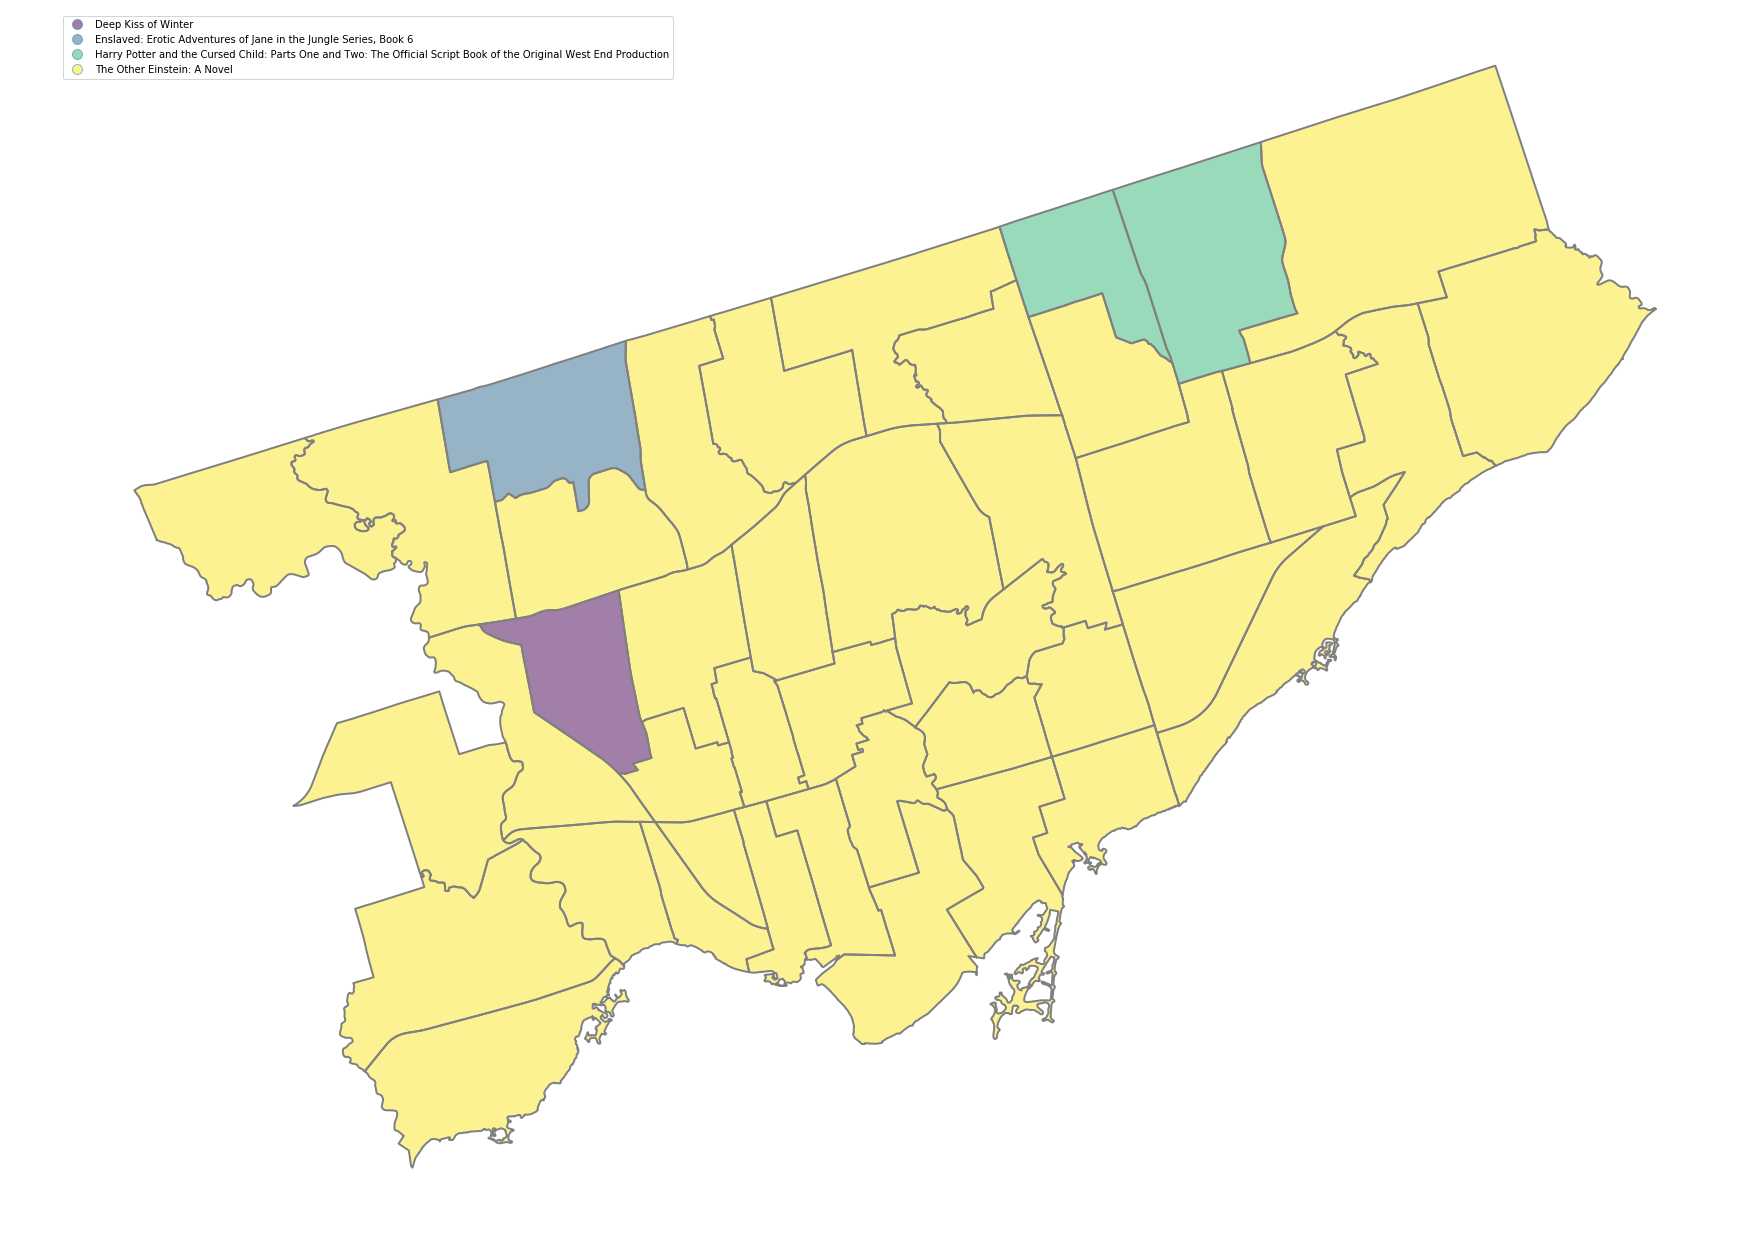

In [185]:
ax = wards_with_titles.plot(column='Title', figsize = (30,50), edgecolor = 'grey', linewidth =2, cmap='viridis', legend=True)
ax.axis('off')
plt.legend(fontsize=12)

plt.savefig('popular_ebooks_in_wards.pdf')